<a href="https://colab.research.google.com/github/ekinare/Factory_Ekin/blob/master/%EA%B0%80%EC%9A%94%EC%9E%90%EA%B3%A1%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
import tensorflow as tf

Using TensorFlow backend.


In [0]:

"""

도 미 솔 라 시# 도 


"""


# 랜덤시드
np.random.seed(5)

#4분의 4박자
N = 4 

# loss 함수 정의
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        

	
# 훈련할 악보데이터 만들기
notes1 = ['Note' , 'Rest']
notes2 = ['Dur:Whole' , 'Dur:Half' , 'Dur:4th' , 'Dur:8th' , 'Dur:16th' , 'Dur:32nd']
notes3 = ['Pos:' + str(i) for i in range(-12,9)] + ['Pos:b0' , 'Pos:#-3' , 'Pos:#-2' , 'Pos:#-1' , 'Pos:#1' , 'Pos:#2' , 'Pos:#4' , 'Pos:n-1' , 'Pos:n-2']
notes4 = ['Dur:Whole' , 'Dur:Half' , 'Dur:4th' , 'Dur:8th' , 'Dur:16th' , 'Dur:32nd']
notes5 = ['Stem=Up' , 'Stem=Down']
notes6 = ['Beam=First' , 'Beam=End']
notes7 = ['' , ',Dotted']
notes8 = ['' , '^']
notes9 = ['' , 'B']

all_cs = []

#여러 요소들을 조합하여 음표사전 만드는 데에 참조할 단어집합 만들기
for s2 in notes2:
    for s3 in notes7:
        for s4 in notes3:
            for s5 in notes8:
                for s6 in notes9:
                    cs = ('|Note|' + s2 + s3 + '|' + s4 + s5 + '|' + s6)
                    all_cs = all_cs + [cs]
                    #print(cs)
#|Note|Dur:4th|Pos:#-1 
                
for s1 in notes4:
    for s2 in notes7:
        cs = ('|Rest|' + s1 + s2)
        all_cs = all_cs + [cs]
        #print(cs) 

all_cs2 = []
for s in all_cs:
    if s[len(s)-1] == '|':
        s = s[:-1]
    all_cs2.append(s)
all_cs = all_cs2
    
#음표사전 만들기  1: Note|Dur:4th|Pos:#-1 
idx = [idx for idx in range(0,len(all_cs))]
idx2code = dict(zip(idx , all_cs))
code2idx = dict(zip(all_cs , idx))



In [4]:
len(all_cs) , len(idx2code) , len(code2idx)

(1452, 1452, 1452)

In [4]:

import codecs
from bs4 import BeautifulSoup

#트레이닝할 악보 읽어오기(가요 '목로주점'외 10곡)
fp = codecs.open("drive/My Drive/딥러닝/가요작곡가의탄생/NOTES.txt", "r")
lines = fp.readlines()
fp.close()



# 전처리하기 
all_lines = [] 

for str1 in lines:
    if not bool(str1.find('Bar')+1) and not bool(str1.find('Chord')+1):
        str1 = str1.replace("\n","")
        str1 = str1.replace("Stem=Up,","")
        str1 = str1.replace("Stem=Down,","")
        str1 = str1.replace("Opts:Beam=First","B")
        str1 = str1.replace("|Opts:Beam=End","")        
        str1 = str1.replace("Opts:Beam","B")    
        str1 = str1.replace(",Slur","")                
        str1 = str1.replace("|Opts:Stem=Up","")  
        str1 = str1.replace("|Opts:Stem=Down","")  
        str1 = str1.replace(",Triplet=First","")     
        str1 = str1.replace(",Triplet=End","")
        str1 = str1.replace(",Triplet","") 
        all_lines.append(str1)
        print(str1) 
		


|Rest|Dur:Whole
|Note|Dur:4th|Pos:-9
|Rest|Dur:8th
|Note|Dur:8th|Pos:-9
|Note|Dur:4th|Pos:-4
|Note|Dur:4th|Pos:-4
|Note|Dur:4th|Pos:-4
|Note|Dur:4th,Dotted|Pos:-4^
|Note|Dur:16th|Pos:-4|B
|Note|Dur:16th|Pos:-5^
|Note|Dur:4th|Pos:-5
|Note|Dur:8th|Pos:-6|B
|Note|Dur:8th|Pos:-6^
|Note|Dur:4th|Pos:-6
|Note|Dur:4th|Pos:-5
|Note|Dur:4th|Pos:-8
|Note|Dur:Whole|Pos:-6
|Note|Dur:4th|Pos:-9
|Rest|Dur:8th
|Note|Dur:8th|Pos:-9
|Note|Dur:8th|Pos:-5|B
|Note|Dur:8th|Pos:-5^
|Note|Dur:4th|Pos:-5
|Note|Dur:8th|Pos:-5|B
|Note|Dur:8th|Pos:-5
|Note|Dur:8th|Pos:-5|B
|Note|Dur:8th|Pos:-5^
|Note|Dur:Half|Pos:-5
|Note|Dur:4th|Pos:-5
|Note|Dur:8th|Pos:-5|B
|Note|Dur:8th|Pos:-5^
|Note|Dur:8th|Pos:-5|B
|Note|Dur:8th|Pos:-9
|Note|Dur:4th|Pos:-9^
|Note|Dur:Whole|Pos:-9
|Note|Dur:4th|Pos:-9
|Rest|Dur:8th
|Note|Dur:8th|Pos:-9
|Note|Dur:8th|Pos:-4|B
|Note|Dur:8th|Pos:-4^
|Note|Dur:4th|Pos:-4
|Note|Dur:4th|Pos:-4
|Note|Dur:4th,Dotted|Pos:-4^
|Note|Dur:16th|Pos:-4|B
|Note|Dur:16th|Pos:-5^
|Note|Dur:4th|Pos:-5
|Note|Dur

In [101]:

# training data set만들기
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

#LSTM에 넣을 재료 만들기
seq = all_lines
dataset = seq2dataset(seq, window_size = 3)
print(dataset.shape)
'''
    4       1마디에 4개가 있어서 
3[      ]
0[      ]
6[      ]
4[      ]


'''

#input / target 설정하기
max_idx_value = len(idx2code)-1
x_train = dataset[:,0:3]
y_train = dataset[:,3]
print("dataset : {}".format(dataset))
'''
입력값 마디 중 앞에 3개 
결과값 마디 중 마지막 1개

'''
print("x_train : {}".format(x_train))
#입력값 정규화 
#질문 1 : 이 자리에 sigmoid 함수같은 활성화 함수가 사용 가능한지
x_train = x_train / float(max_idx_value)

#데이터건수*time step*1
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print("x_train : {}".format(x_train))
#one-hot encoding
print("y_train : {}".format(y_train))
y_train = np_utils.to_categorical(y_train)
print("y_train : {}".format(y_train[-1][51])) # 해당하는 위치에 1 나머지 0

one_hot_vec_size = y_train.shape[1]
x_train.shape , y_train.shape , one_hot_vec_size

(3064, 4)
dataset : [[1440  492 1446  732]
 [ 492 1446  732  512]
 [1446  732  512  512]
 ...
 [ 782  781  772  648]
 [ 781  772  648  776]
 [ 772  648  776   52]]
x_train : [[1440  492 1446]
 [ 492 1446  732]
 [1446  732  512]
 ...
 [ 782  781  772]
 [ 781  772  648]
 [ 772  648  776]]
x_train : [[[0.99241902]
  [0.3390765 ]
  [0.9965541 ]]

 [[0.3390765 ]
  [0.9965541 ]
  [0.50447967]]

 [[0.9965541 ]
  [0.50447967]
  [0.3528601 ]]

 ...

 [[0.53893866]
  [0.53824948]
  [0.53204686]]

 [[0.53824948]
  [0.53204686]
  [0.44658856]]

 [[0.53204686]
  [0.44658856]
  [0.53480358]]]
y_train : [732 512 512 ... 648 776  52]
y_train : 0.0


((3064, 3, 1), (3064, 1451), 1451)

In [104]:


# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.utils import np_utils
#모델 설계
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape = (3, 1)))
model.add(tf.keras.layers.Dense(one_hot_vec_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
#loss function
history = LossHistory()
# history.init()
# print(type(history))


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_4 (Dense)              (None, 1451)              187179    
Total params: 253,739
Trainable params: 253,739
Non-trainable params: 0
_________________________________________________________________
None


In [105]:

#모델 학습시작
# model.fit(x_train, y_train, epochs=1000, batch_size=14, verbose=2 )
model.fit(x_train, y_train, epochs=1000, batch_size=14, verbose=2, callbacks= [history] )

# # 트레이닝 과정
# %matplotlib inline
# import matplotlib.pyplot as plt

# plt.plot(history.losses)
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train'], loc='upper left')
# plt.show()



Epoch 1/1000


KeyboardInterrupt: ignored

####history에서 계속 오류가 발생하여 plot할수 있도록 위에 있는 결과 처리하기위해 복사하여 붙여 넣었음


In [0]:
all_result ='''
Epoch 1/1000
219/219 - 1s - loss: 5.8533 - accuracy: 0.0290
Epoch 2/1000
219/219 - 1s - loss: 5.1925 - accuracy: 0.0290
Epoch 3/1000
219/219 - 1s - loss: 5.1572 - accuracy: 0.0284
Epoch 4/1000
219/219 - 1s - loss: 5.1455 - accuracy: 0.0287
Epoch 5/1000
219/219 - 1s - loss: 5.1377 - accuracy: 0.0268
Epoch 6/1000
219/219 - 1s - loss: 5.1318 - accuracy: 0.0297
Epoch 7/1000
219/219 - 1s - loss: 5.1250 - accuracy: 0.0310
Epoch 8/1000
219/219 - 1s - loss: 5.1112 - accuracy: 0.0375
Epoch 9/1000
219/219 - 1s - loss: 5.0481 - accuracy: 0.0408
Epoch 10/1000
219/219 - 1s - loss: 4.9783 - accuracy: 0.0434
Epoch 11/1000
219/219 - 1s - loss: 4.9419 - accuracy: 0.0418
Epoch 12/1000
219/219 - 1s - loss: 4.9187 - accuracy: 0.0444
Epoch 13/1000
219/219 - 1s - loss: 4.8924 - accuracy: 0.0460
Epoch 14/1000
219/219 - 1s - loss: 4.8622 - accuracy: 0.0493
Epoch 15/1000
219/219 - 1s - loss: 4.8270 - accuracy: 0.0535
Epoch 16/1000
219/219 - 1s - loss: 4.7897 - accuracy: 0.0532
Epoch 17/1000
219/219 - 1s - loss: 4.7491 - accuracy: 0.0610
Epoch 18/1000
219/219 - 1s - loss: 4.7148 - accuracy: 0.0617
Epoch 19/1000
219/219 - 1s - loss: 4.6816 - accuracy: 0.0669
Epoch 20/1000
219/219 - 1s - loss: 4.6444 - accuracy: 0.0649
Epoch 21/1000
219/219 - 1s - loss: 4.6111 - accuracy: 0.0708
Epoch 22/1000
219/219 - 1s - loss: 4.5757 - accuracy: 0.0718
Epoch 23/1000
219/219 - 1s - loss: 4.5431 - accuracy: 0.0757
Epoch 24/1000
219/219 - 1s - loss: 4.5080 - accuracy: 0.0754
Epoch 25/1000
219/219 - 1s - loss: 4.4723 - accuracy: 0.0767
Epoch 26/1000
219/219 - 1s - loss: 4.4344 - accuracy: 0.0770
Epoch 27/1000
219/219 - 1s - loss: 4.4058 - accuracy: 0.0836
Epoch 28/1000
219/219 - 1s - loss: 4.3727 - accuracy: 0.0898
Epoch 29/1000
219/219 - 1s - loss: 4.3395 - accuracy: 0.0907
Epoch 30/1000
219/219 - 1s - loss: 4.3090 - accuracy: 0.0953
Epoch 31/1000
219/219 - 1s - loss: 4.2753 - accuracy: 0.1018
Epoch 32/1000
219/219 - 1s - loss: 4.2485 - accuracy: 0.1022
Epoch 33/1000
219/219 - 1s - loss: 4.2160 - accuracy: 0.1090
Epoch 34/1000
219/219 - 1s - loss: 4.1830 - accuracy: 0.1070
Epoch 35/1000
219/219 - 1s - loss: 4.1592 - accuracy: 0.1100
Epoch 36/1000
219/219 - 1s - loss: 4.1292 - accuracy: 0.1110
Epoch 37/1000
219/219 - 1s - loss: 4.1037 - accuracy: 0.1123
Epoch 38/1000
219/219 - 1s - loss: 4.0756 - accuracy: 0.1126
Epoch 39/1000
219/219 - 1s - loss: 4.0475 - accuracy: 0.1149
Epoch 40/1000
219/219 - 1s - loss: 4.0267 - accuracy: 0.1211
Epoch 41/1000
219/219 - 1s - loss: 4.0034 - accuracy: 0.1198
Epoch 42/1000
219/219 - 1s - loss: 3.9791 - accuracy: 0.1237
Epoch 43/1000
219/219 - 1s - loss: 3.9515 - accuracy: 0.1289
Epoch 44/1000
219/219 - 1s - loss: 3.9307 - accuracy: 0.1243
Epoch 45/1000
219/219 - 1s - loss: 3.9073 - accuracy: 0.1283
Epoch 46/1000
219/219 - 1s - loss: 3.8885 - accuracy: 0.1338
Epoch 47/1000
219/219 - 1s - loss: 3.8646 - accuracy: 0.1279
Epoch 48/1000
219/219 - 1s - loss: 3.8396 - accuracy: 0.1354
Epoch 49/1000
219/219 - 1s - loss: 3.8260 - accuracy: 0.1325
Epoch 50/1000
219/219 - 1s - loss: 3.8022 - accuracy: 0.1292
Epoch 51/1000
219/219 - 1s - loss: 3.7818 - accuracy: 0.1319
Epoch 52/1000
219/219 - 1s - loss: 3.7601 - accuracy: 0.1387
Epoch 53/1000
219/219 - 1s - loss: 3.7445 - accuracy: 0.1423
Epoch 54/1000
219/219 - 1s - loss: 3.7235 - accuracy: 0.1423
Epoch 55/1000
219/219 - 1s - loss: 3.7020 - accuracy: 0.1482
Epoch 56/1000
219/219 - 1s - loss: 3.6861 - accuracy: 0.1446
Epoch 57/1000
219/219 - 1s - loss: 3.6682 - accuracy: 0.1443
Epoch 58/1000
219/219 - 1s - loss: 3.6524 - accuracy: 0.1495
Epoch 59/1000
219/219 - 1s - loss: 3.6345 - accuracy: 0.1514
Epoch 60/1000
219/219 - 1s - loss: 3.6144 - accuracy: 0.1547
Epoch 61/1000
219/219 - 1s - loss: 3.5928 - accuracy: 0.1567
Epoch 62/1000
219/219 - 1s - loss: 3.5799 - accuracy: 0.1583
Epoch 63/1000
219/219 - 1s - loss: 3.5625 - accuracy: 0.1563
Epoch 64/1000
219/219 - 1s - loss: 3.5448 - accuracy: 0.1589
Epoch 65/1000
219/219 - 1s - loss: 3.5333 - accuracy: 0.1599
Epoch 66/1000
219/219 - 1s - loss: 3.5170 - accuracy: 0.1625
Epoch 67/1000
219/219 - 1s - loss: 3.5058 - accuracy: 0.1674
Epoch 68/1000
219/219 - 1s - loss: 3.4904 - accuracy: 0.1674
Epoch 69/1000
219/219 - 1s - loss: 3.4697 - accuracy: 0.1704
Epoch 70/1000
219/219 - 1s - loss: 3.4541 - accuracy: 0.1658
Epoch 71/1000
219/219 - 1s - loss: 3.4435 - accuracy: 0.1717
Epoch 72/1000
219/219 - 1s - loss: 3.4289 - accuracy: 0.1707
Epoch 73/1000
219/219 - 1s - loss: 3.4165 - accuracy: 0.1723
Epoch 74/1000
219/219 - 1s - loss: 3.3981 - accuracy: 0.1713
Epoch 75/1000
219/219 - 1s - loss: 3.3867 - accuracy: 0.1723
Epoch 76/1000
219/219 - 1s - loss: 3.3713 - accuracy: 0.1753
Epoch 77/1000
219/219 - 1s - loss: 3.3603 - accuracy: 0.1808
Epoch 78/1000
219/219 - 1s - loss: 3.3451 - accuracy: 0.1802
Epoch 79/1000
219/219 - 1s - loss: 3.3385 - accuracy: 0.1789
Epoch 80/1000
219/219 - 1s - loss: 3.3193 - accuracy: 0.1759
Epoch 81/1000
219/219 - 1s - loss: 3.3110 - accuracy: 0.1815
Epoch 82/1000
219/219 - 1s - loss: 3.2868 - accuracy: 0.1841
Epoch 83/1000
219/219 - 1s - loss: 3.2827 - accuracy: 0.1818
Epoch 84/1000
219/219 - 1s - loss: 3.2741 - accuracy: 0.1870
Epoch 85/1000
219/219 - 1s - loss: 3.2626 - accuracy: 0.1769
Epoch 86/1000
219/219 - 1s - loss: 3.2485 - accuracy: 0.1942
Epoch 87/1000
219/219 - 1s - loss: 3.2346 - accuracy: 0.1893
Epoch 88/1000
219/219 - 1s - loss: 3.2292 - accuracy: 0.1854
Epoch 89/1000
219/219 - 1s - loss: 3.2130 - accuracy: 0.1981
Epoch 90/1000
219/219 - 1s - loss: 3.2044 - accuracy: 0.1942
Epoch 91/1000
219/219 - 1s - loss: 3.1900 - accuracy: 0.1971
Epoch 92/1000
219/219 - 1s - loss: 3.1732 - accuracy: 0.2043
Epoch 93/1000
219/219 - 1s - loss: 3.1653 - accuracy: 0.2007
Epoch 94/1000
219/219 - 1s - loss: 3.1537 - accuracy: 0.2014
Epoch 95/1000
219/219 - 1s - loss: 3.1437 - accuracy: 0.2027
Epoch 96/1000
219/219 - 1s - loss: 3.1340 - accuracy: 0.2102
Epoch 97/1000
219/219 - 1s - loss: 3.1236 - accuracy: 0.2076
Epoch 98/1000
219/219 - 1s - loss: 3.1079 - accuracy: 0.2112
Epoch 99/1000
219/219 - 1s - loss: 3.1060 - accuracy: 0.2121
Epoch 100/1000
219/219 - 1s - loss: 3.0890 - accuracy: 0.2095
Epoch 101/1000
219/219 - 1s - loss: 3.0816 - accuracy: 0.2151
Epoch 102/1000
219/219 - 1s - loss: 3.0735 - accuracy: 0.2121
Epoch 103/1000
219/219 - 1s - loss: 3.0571 - accuracy: 0.2170
Epoch 104/1000
219/219 - 1s - loss: 3.0524 - accuracy: 0.2210
Epoch 105/1000
219/219 - 1s - loss: 3.0393 - accuracy: 0.2193
Epoch 106/1000
219/219 - 1s - loss: 3.0259 - accuracy: 0.2177
Epoch 107/1000
219/219 - 1s - loss: 3.0205 - accuracy: 0.2252
Epoch 108/1000
219/219 - 1s - loss: 3.0074 - accuracy: 0.2281
Epoch 109/1000
219/219 - 1s - loss: 2.9956 - accuracy: 0.2226
Epoch 110/1000
219/219 - 1s - loss: 2.9895 - accuracy: 0.2258
Epoch 111/1000
219/219 - 1s - loss: 2.9785 - accuracy: 0.2258
Epoch 112/1000
219/219 - 1s - loss: 2.9774 - accuracy: 0.2281
Epoch 113/1000
219/219 - 1s - loss: 2.9559 - accuracy: 0.2373
Epoch 114/1000
219/219 - 1s - loss: 2.9486 - accuracy: 0.2262
Epoch 115/1000
219/219 - 1s - loss: 2.9443 - accuracy: 0.2369
Epoch 116/1000
219/219 - 1s - loss: 2.9325 - accuracy: 0.2327
Epoch 117/1000
219/219 - 1s - loss: 2.9236 - accuracy: 0.2405
Epoch 118/1000
219/219 - 1s - loss: 2.9250 - accuracy: 0.2379
Epoch 119/1000
219/219 - 1s - loss: 2.9159 - accuracy: 0.2350
Epoch 120/1000
219/219 - 1s - loss: 2.8995 - accuracy: 0.2405
Epoch 121/1000
219/219 - 1s - loss: 2.8895 - accuracy: 0.2366
Epoch 122/1000
219/219 - 1s - loss: 2.8750 - accuracy: 0.2467
Epoch 123/1000
219/219 - 1s - loss: 2.8794 - accuracy: 0.2399
Epoch 124/1000
219/219 - 1s - loss: 2.8614 - accuracy: 0.2493
Epoch 125/1000
219/219 - 1s - loss: 2.8562 - accuracy: 0.2484
Epoch 126/1000
219/219 - 1s - loss: 2.8565 - accuracy: 0.2497
Epoch 127/1000
219/219 - 1s - loss: 2.8480 - accuracy: 0.2493
Epoch 128/1000
219/219 - 1s - loss: 2.8331 - accuracy: 0.2503
Epoch 129/1000
219/219 - 1s - loss: 2.8209 - accuracy: 0.2523
Epoch 130/1000
219/219 - 1s - loss: 2.8192 - accuracy: 0.2533
Epoch 131/1000
219/219 - 1s - loss: 2.8063 - accuracy: 0.2562
Epoch 132/1000
219/219 - 1s - loss: 2.8012 - accuracy: 0.2585
Epoch 133/1000
219/219 - 1s - loss: 2.7889 - accuracy: 0.2604
Epoch 134/1000
219/219 - 1s - loss: 2.7737 - accuracy: 0.2591
Epoch 135/1000
219/219 - 1s - loss: 2.7799 - accuracy: 0.2555
Epoch 136/1000
219/219 - 1s - loss: 2.7687 - accuracy: 0.2575
Epoch 137/1000
219/219 - 1s - loss: 2.7625 - accuracy: 0.2647
Epoch 138/1000
219/219 - 1s - loss: 2.7501 - accuracy: 0.2676
Epoch 139/1000
219/219 - 1s - loss: 2.7470 - accuracy: 0.2650
Epoch 140/1000
219/219 - 1s - loss: 2.7333 - accuracy: 0.2670
Epoch 141/1000
219/219 - 1s - loss: 2.7397 - accuracy: 0.2634
Epoch 142/1000
219/219 - 1s - loss: 2.7247 - accuracy: 0.2693
Epoch 143/1000
219/219 - 1s - loss: 2.7182 - accuracy: 0.2742
Epoch 144/1000
219/219 - 1s - loss: 2.7111 - accuracy: 0.2715
Epoch 145/1000
219/219 - 1s - loss: 2.6985 - accuracy: 0.2768
Epoch 146/1000
219/219 - 1s - loss: 2.6900 - accuracy: 0.2774
Epoch 147/1000
219/219 - 1s - loss: 2.6915 - accuracy: 0.2706
Epoch 148/1000
219/219 - 1s - loss: 2.6835 - accuracy: 0.2755
Epoch 149/1000
219/219 - 1s - loss: 2.6730 - accuracy: 0.2817
Epoch 150/1000
219/219 - 1s - loss: 2.6723 - accuracy: 0.2813
Epoch 151/1000
219/219 - 1s - loss: 2.6604 - accuracy: 0.2797
Epoch 152/1000
219/219 - 1s - loss: 2.6558 - accuracy: 0.2862
Epoch 153/1000
219/219 - 1s - loss: 2.6456 - accuracy: 0.2869
Epoch 154/1000
219/219 - 1s - loss: 2.6449 - accuracy: 0.2800
Epoch 155/1000
219/219 - 1s - loss: 2.6331 - accuracy: 0.2849
Epoch 156/1000
219/219 - 1s - loss: 2.6209 - accuracy: 0.2908
Epoch 157/1000
219/219 - 1s - loss: 2.6263 - accuracy: 0.2813
Epoch 158/1000
219/219 - 1s - loss: 2.6155 - accuracy: 0.2895
Epoch 159/1000
219/219 - 1s - loss: 2.6099 - accuracy: 0.2944
Epoch 160/1000
219/219 - 1s - loss: 2.6098 - accuracy: 0.2928
Epoch 161/1000
219/219 - 1s - loss: 2.6015 - accuracy: 0.2895
Epoch 162/1000
219/219 - 1s - loss: 2.5961 - accuracy: 0.2918
Epoch 163/1000
219/219 - 1s - loss: 2.5907 - accuracy: 0.2941
Epoch 164/1000
219/219 - 1s - loss: 2.5788 - accuracy: 0.2957
Epoch 165/1000
219/219 - 1s - loss: 2.5847 - accuracy: 0.2872
Epoch 166/1000
219/219 - 1s - loss: 2.5599 - accuracy: 0.2960
Epoch 167/1000
219/219 - 1s - loss: 2.5651 - accuracy: 0.3016
Epoch 168/1000
219/219 - 1s - loss: 2.5575 - accuracy: 0.2911
Epoch 169/1000
219/219 - 1s - loss: 2.5536 - accuracy: 0.2999
Epoch 170/1000
219/219 - 1s - loss: 2.5443 - accuracy: 0.3055
Epoch 171/1000
219/219 - 1s - loss: 2.5325 - accuracy: 0.3025
Epoch 172/1000
219/219 - 1s - loss: 2.5338 - accuracy: 0.3006
Epoch 173/1000
219/219 - 1s - loss: 2.5305 - accuracy: 0.3045
Epoch 174/1000
219/219 - 1s - loss: 2.5241 - accuracy: 0.3065
Epoch 175/1000
219/219 - 1s - loss: 2.5242 - accuracy: 0.3016
Epoch 176/1000
219/219 - 1s - loss: 2.5136 - accuracy: 0.3012
Epoch 177/1000
219/219 - 1s - loss: 2.5115 - accuracy: 0.3065
Epoch 178/1000
219/219 - 1s - loss: 2.4934 - accuracy: 0.3101
Epoch 179/1000
219/219 - 1s - loss: 2.4939 - accuracy: 0.3025
Epoch 180/1000
219/219 - 1s - loss: 2.4997 - accuracy: 0.3107
Epoch 181/1000
219/219 - 1s - loss: 2.4916 - accuracy: 0.3133
Epoch 182/1000
219/219 - 1s - loss: 2.4786 - accuracy: 0.3163
Epoch 183/1000
219/219 - 1s - loss: 2.4726 - accuracy: 0.3136
Epoch 184/1000
219/219 - 1s - loss: 2.4708 - accuracy: 0.3146
Epoch 185/1000
219/219 - 1s - loss: 2.4688 - accuracy: 0.3114
Epoch 186/1000
219/219 - 1s - loss: 2.4579 - accuracy: 0.3127
Epoch 187/1000
219/219 - 1s - loss: 2.4527 - accuracy: 0.3182
Epoch 188/1000
219/219 - 1s - loss: 2.4466 - accuracy: 0.3149
Epoch 189/1000
219/219 - 1s - loss: 2.4375 - accuracy: 0.3221
Epoch 190/1000
219/219 - 1s - loss: 2.4438 - accuracy: 0.3267
Epoch 191/1000
219/219 - 1s - loss: 2.4306 - accuracy: 0.3205
Epoch 192/1000
219/219 - 1s - loss: 2.4317 - accuracy: 0.3267
Epoch 193/1000
219/219 - 1s - loss: 2.4254 - accuracy: 0.3185
Epoch 194/1000
219/219 - 1s - loss: 2.4151 - accuracy: 0.3215
Epoch 195/1000
219/219 - 1s - loss: 2.4078 - accuracy: 0.3254
Epoch 196/1000
219/219 - 1s - loss: 2.4128 - accuracy: 0.3247
Epoch 197/1000
219/219 - 1s - loss: 2.4004 - accuracy: 0.3238
Epoch 198/1000
219/219 - 1s - loss: 2.3994 - accuracy: 0.3267
Epoch 199/1000
219/219 - 1s - loss: 2.3993 - accuracy: 0.3221
Epoch 200/1000
219/219 - 1s - loss: 2.3975 - accuracy: 0.3231
Epoch 201/1000
219/219 - 1s - loss: 2.3795 - accuracy: 0.3264
Epoch 202/1000
219/219 - 1s - loss: 2.3797 - accuracy: 0.3280
Epoch 203/1000
219/219 - 1s - loss: 2.3777 - accuracy: 0.3225
Epoch 204/1000
219/219 - 1s - loss: 2.3745 - accuracy: 0.3260
Epoch 205/1000
219/219 - 1s - loss: 2.3747 - accuracy: 0.3251
Epoch 206/1000
219/219 - 1s - loss: 2.3557 - accuracy: 0.3329
Epoch 207/1000
219/219 - 1s - loss: 2.3591 - accuracy: 0.3306
Epoch 208/1000
219/219 - 1s - loss: 2.3496 - accuracy: 0.3316
Epoch 209/1000
219/219 - 1s - loss: 2.3477 - accuracy: 0.3322
Epoch 210/1000
219/219 - 1s - loss: 2.3474 - accuracy: 0.3316
Epoch 211/1000
219/219 - 1s - loss: 2.3373 - accuracy: 0.3342
Epoch 212/1000
219/219 - 1s - loss: 2.3414 - accuracy: 0.3303
Epoch 213/1000
219/219 - 1s - loss: 2.3354 - accuracy: 0.3336
Epoch 214/1000
219/219 - 1s - loss: 2.3179 - accuracy: 0.3424
Epoch 215/1000
219/219 - 1s - loss: 2.3290 - accuracy: 0.3358
Epoch 216/1000
219/219 - 1s - loss: 2.3256 - accuracy: 0.3332
Epoch 217/1000
219/219 - 1s - loss: 2.3183 - accuracy: 0.3433
Epoch 218/1000
219/219 - 1s - loss: 2.3112 - accuracy: 0.3339
Epoch 219/1000
219/219 - 1s - loss: 2.3129 - accuracy: 0.3417
Epoch 220/1000
219/219 - 1s - loss: 2.3021 - accuracy: 0.3502
Epoch 221/1000
219/219 - 1s - loss: 2.3019 - accuracy: 0.3316
Epoch 222/1000
219/219 - 1s - loss: 2.3021 - accuracy: 0.3358
Epoch 223/1000
219/219 - 1s - loss: 2.2952 - accuracy: 0.3443
Epoch 224/1000
219/219 - 1s - loss: 2.2903 - accuracy: 0.3407
Epoch 225/1000
219/219 - 1s - loss: 2.2881 - accuracy: 0.3522
Epoch 226/1000
219/219 - 1s - loss: 2.2781 - accuracy: 0.3443
Epoch 227/1000
219/219 - 1s - loss: 2.2697 - accuracy: 0.3450
Epoch 228/1000
219/219 - 1s - loss: 2.2841 - accuracy: 0.3460
Epoch 229/1000
219/219 - 1s - loss: 2.2701 - accuracy: 0.3479
Epoch 230/1000
219/219 - 1s - loss: 2.2640 - accuracy: 0.3489
Epoch 231/1000
219/219 - 1s - loss: 2.2544 - accuracy: 0.3427
Epoch 232/1000
219/219 - 1s - loss: 2.2484 - accuracy: 0.3502
Epoch 233/1000
219/219 - 1s - loss: 2.2459 - accuracy: 0.3541
Epoch 234/1000
219/219 - 1s - loss: 2.2575 - accuracy: 0.3394
Epoch 235/1000
219/219 - 1s - loss: 2.2529 - accuracy: 0.3427
Epoch 236/1000
219/219 - 1s - loss: 2.2449 - accuracy: 0.3433
Epoch 237/1000
219/219 - 1s - loss: 2.2401 - accuracy: 0.3518
Epoch 238/1000
219/219 - 1s - loss: 2.2272 - accuracy: 0.3554
Epoch 239/1000
219/219 - 1s - loss: 2.2304 - accuracy: 0.3531
Epoch 240/1000
219/219 - 1s - loss: 2.2235 - accuracy: 0.3577
Epoch 241/1000
219/219 - 1s - loss: 2.2161 - accuracy: 0.3512
Epoch 242/1000
219/219 - 1s - loss: 2.2135 - accuracy: 0.3512
Epoch 243/1000
219/219 - 1s - loss: 2.2375 - accuracy: 0.3427
Epoch 244/1000
219/219 - 1s - loss: 2.2187 - accuracy: 0.3502
Epoch 245/1000
219/219 - 1s - loss: 2.2075 - accuracy: 0.3580
Epoch 246/1000
219/219 - 1s - loss: 2.2150 - accuracy: 0.3508
Epoch 247/1000
219/219 - 1s - loss: 2.2062 - accuracy: 0.3574
Epoch 248/1000
219/219 - 1s - loss: 2.2135 - accuracy: 0.3508
Epoch 249/1000
219/219 - 1s - loss: 2.1850 - accuracy: 0.3610
Epoch 250/1000
219/219 - 1s - loss: 2.1927 - accuracy: 0.3675
Epoch 251/1000
219/219 - 1s - loss: 2.1847 - accuracy: 0.3600
Epoch 252/1000
219/219 - 1s - loss: 2.1809 - accuracy: 0.3613
Epoch 253/1000
219/219 - 1s - loss: 2.2008 - accuracy: 0.3495
Epoch 254/1000
219/219 - 1s - loss: 2.1766 - accuracy: 0.3646
Epoch 255/1000
219/219 - 1s - loss: 2.1694 - accuracy: 0.3688
Epoch 256/1000
219/219 - 1s - loss: 2.1714 - accuracy: 0.3613
Epoch 257/1000
219/219 - 1s - loss: 2.1748 - accuracy: 0.3623
Epoch 258/1000
219/219 - 1s - loss: 2.1649 - accuracy: 0.3730
Epoch 259/1000
219/219 - 1s - loss: 2.1606 - accuracy: 0.3655
Epoch 260/1000
219/219 - 1s - loss: 2.1784 - accuracy: 0.3603
Epoch 261/1000
219/219 - 1s - loss: 2.1539 - accuracy: 0.3652
Epoch 262/1000
219/219 - 1s - loss: 2.1491 - accuracy: 0.3681
Epoch 263/1000
219/219 - 1s - loss: 2.1488 - accuracy: 0.3662
Epoch 264/1000
219/219 - 1s - loss: 2.1363 - accuracy: 0.3691
Epoch 265/1000
219/219 - 1s - loss: 2.1332 - accuracy: 0.3802
Epoch 266/1000
219/219 - 1s - loss: 2.1462 - accuracy: 0.3652
Epoch 267/1000
219/219 - 1s - loss: 2.1456 - accuracy: 0.3695
Epoch 268/1000
219/219 - 1s - loss: 2.1298 - accuracy: 0.3659
Epoch 269/1000
219/219 - 1s - loss: 2.1278 - accuracy: 0.3812
Epoch 270/1000
219/219 - 1s - loss: 2.1236 - accuracy: 0.3655
Epoch 271/1000
219/219 - 1s - loss: 2.1173 - accuracy: 0.3743
Epoch 272/1000
219/219 - 1s - loss: 2.1150 - accuracy: 0.3662
Epoch 273/1000
219/219 - 1s - loss: 2.1212 - accuracy: 0.3714
Epoch 274/1000
219/219 - 1s - loss: 2.1202 - accuracy: 0.3809
Epoch 275/1000
219/219 - 1s - loss: 2.1067 - accuracy: 0.3763
Epoch 276/1000
219/219 - 1s - loss: 2.1151 - accuracy: 0.3678
Epoch 277/1000
219/219 - 1s - loss: 2.1025 - accuracy: 0.3779
Epoch 278/1000
219/219 - 1s - loss: 2.0929 - accuracy: 0.3747
Epoch 279/1000
219/219 - 1s - loss: 2.0953 - accuracy: 0.3760
Epoch 280/1000
219/219 - 1s - loss: 2.0862 - accuracy: 0.3809
Epoch 281/1000
219/219 - 1s - loss: 2.0876 - accuracy: 0.3747
Epoch 282/1000
219/219 - 1s - loss: 2.0914 - accuracy: 0.3851
Epoch 283/1000
219/219 - 1s - loss: 2.0767 - accuracy: 0.3779
Epoch 284/1000
219/219 - 1s - loss: 2.0922 - accuracy: 0.3727
Epoch 285/1000
219/219 - 1s - loss: 2.0947 - accuracy: 0.3721
Epoch 286/1000
219/219 - 1s - loss: 2.0801 - accuracy: 0.3812
Epoch 287/1000
219/219 - 1s - loss: 2.0766 - accuracy: 0.3805
Epoch 288/1000
219/219 - 1s - loss: 2.0787 - accuracy: 0.3747
Epoch 289/1000
219/219 - 1s - loss: 2.0655 - accuracy: 0.3799
Epoch 290/1000
219/219 - 1s - loss: 2.0632 - accuracy: 0.3867
Epoch 291/1000
219/219 - 1s - loss: 2.0617 - accuracy: 0.3796
Epoch 292/1000
219/219 - 1s - loss: 2.0706 - accuracy: 0.3799
Epoch 293/1000
219/219 - 1s - loss: 2.0542 - accuracy: 0.3864
Epoch 294/1000
219/219 - 1s - loss: 2.0529 - accuracy: 0.3881
Epoch 295/1000
219/219 - 1s - loss: 2.0536 - accuracy: 0.3825
Epoch 296/1000
219/219 - 1s - loss: 2.0533 - accuracy: 0.3841
Epoch 297/1000
219/219 - 1s - loss: 2.0502 - accuracy: 0.3923
Epoch 298/1000
219/219 - 1s - loss: 2.0461 - accuracy: 0.3848
Epoch 299/1000
219/219 - 1s - loss: 2.0317 - accuracy: 0.3949
Epoch 300/1000
219/219 - 1s - loss: 2.0391 - accuracy: 0.3867
Epoch 301/1000
219/219 - 1s - loss: 2.0343 - accuracy: 0.3943
Epoch 302/1000
219/219 - 1s - loss: 2.0325 - accuracy: 0.3910
Epoch 303/1000
219/219 - 1s - loss: 2.0386 - accuracy: 0.3864
Epoch 304/1000
219/219 - 1s - loss: 2.0239 - accuracy: 0.3959
Epoch 305/1000
219/219 - 1s - loss: 2.0237 - accuracy: 0.3907
Epoch 306/1000
219/219 - 1s - loss: 2.0178 - accuracy: 0.3952
Epoch 307/1000
219/219 - 1s - loss: 2.0168 - accuracy: 0.3894
Epoch 308/1000
219/219 - 1s - loss: 2.0140 - accuracy: 0.3959
Epoch 309/1000
219/219 - 1s - loss: 2.0169 - accuracy: 0.3920
Epoch 310/1000
219/219 - 1s - loss: 2.0254 - accuracy: 0.3903
Epoch 311/1000
219/219 - 1s - loss: 2.0054 - accuracy: 0.4011
Epoch 312/1000
219/219 - 1s - loss: 2.0057 - accuracy: 0.3861
Epoch 313/1000
219/219 - 1s - loss: 1.9971 - accuracy: 0.3985
Epoch 314/1000
219/219 - 1s - loss: 2.0006 - accuracy: 0.3956
Epoch 315/1000
219/219 - 1s - loss: 1.9995 - accuracy: 0.4024
Epoch 316/1000
219/219 - 1s - loss: 1.9934 - accuracy: 0.3946
Epoch 317/1000
219/219 - 1s - loss: 1.9859 - accuracy: 0.3992
Epoch 318/1000
219/219 - 1s - loss: 1.9856 - accuracy: 0.4037
Epoch 319/1000
219/219 - 1s - loss: 1.9792 - accuracy: 0.3982
Epoch 320/1000
219/219 - 1s - loss: 1.9739 - accuracy: 0.3985
Epoch 321/1000
219/219 - 1s - loss: 1.9851 - accuracy: 0.3992
Epoch 322/1000
219/219 - 1s - loss: 1.9793 - accuracy: 0.4031
Epoch 323/1000
219/219 - 1s - loss: 1.9829 - accuracy: 0.4008
Epoch 324/1000
219/219 - 1s - loss: 1.9659 - accuracy: 0.4040
Epoch 325/1000
219/219 - 1s - loss: 1.9707 - accuracy: 0.4060
Epoch 326/1000
219/219 - 1s - loss: 1.9760 - accuracy: 0.4060
Epoch 327/1000
219/219 - 1s - loss: 1.9659 - accuracy: 0.4034
Epoch 328/1000
219/219 - 1s - loss: 1.9588 - accuracy: 0.4063
Epoch 329/1000
219/219 - 1s - loss: 1.9592 - accuracy: 0.4027
Epoch 330/1000
219/219 - 1s - loss: 1.9646 - accuracy: 0.4096
Epoch 331/1000
219/219 - 1s - loss: 1.9549 - accuracy: 0.4070
Epoch 332/1000
219/219 - 1s - loss: 1.9595 - accuracy: 0.4050
Epoch 333/1000
219/219 - 1s - loss: 1.9537 - accuracy: 0.4011
Epoch 334/1000
219/219 - 1s - loss: 1.9502 - accuracy: 0.4050
Epoch 335/1000
219/219 - 1s - loss: 1.9458 - accuracy: 0.4112
Epoch 336/1000
219/219 - 1s - loss: 1.9365 - accuracy: 0.4089
Epoch 337/1000
219/219 - 1s - loss: 1.9376 - accuracy: 0.4027
Epoch 338/1000
219/219 - 1s - loss: 1.9401 - accuracy: 0.4086
Epoch 339/1000
219/219 - 1s - loss: 1.9474 - accuracy: 0.4054
Epoch 340/1000
219/219 - 1s - loss: 1.9393 - accuracy: 0.4106
Epoch 341/1000
219/219 - 1s - loss: 1.9246 - accuracy: 0.4093
Epoch 342/1000
219/219 - 1s - loss: 1.9250 - accuracy: 0.4067
Epoch 343/1000
219/219 - 1s - loss: 1.9263 - accuracy: 0.4102
Epoch 344/1000
219/219 - 1s - loss: 1.9149 - accuracy: 0.4207
Epoch 345/1000
219/219 - 1s - loss: 1.9227 - accuracy: 0.4014
Epoch 346/1000
219/219 - 1s - loss: 1.9147 - accuracy: 0.4122
Epoch 347/1000
219/219 - 1s - loss: 1.9286 - accuracy: 0.4050
Epoch 348/1000
219/219 - 1s - loss: 1.9064 - accuracy: 0.4200
Epoch 349/1000
219/219 - 1s - loss: 1.9199 - accuracy: 0.4191
Epoch 350/1000
219/219 - 1s - loss: 1.9081 - accuracy: 0.4119
Epoch 351/1000
219/219 - 1s - loss: 1.9101 - accuracy: 0.4122
Epoch 352/1000
219/219 - 1s - loss: 1.9040 - accuracy: 0.4109
Epoch 353/1000
219/219 - 1s - loss: 1.8957 - accuracy: 0.4164
Epoch 354/1000
219/219 - 1s - loss: 1.9026 - accuracy: 0.4135
Epoch 355/1000
219/219 - 1s - loss: 1.8911 - accuracy: 0.4164
Epoch 356/1000
219/219 - 1s - loss: 1.8946 - accuracy: 0.4191
Epoch 357/1000
219/219 - 1s - loss: 1.8939 - accuracy: 0.4230
Epoch 358/1000
219/219 - 1s - loss: 1.8941 - accuracy: 0.4187
Epoch 359/1000
219/219 - 1s - loss: 1.8814 - accuracy: 0.4204
Epoch 360/1000
219/219 - 1s - loss: 1.8917 - accuracy: 0.4191
Epoch 361/1000
219/219 - 1s - loss: 1.8974 - accuracy: 0.4158
Epoch 362/1000
219/219 - 1s - loss: 1.8912 - accuracy: 0.4223
Epoch 363/1000
219/219 - 1s - loss: 1.8727 - accuracy: 0.4266
Epoch 364/1000
219/219 - 1s - loss: 1.8920 - accuracy: 0.4217
Epoch 365/1000
219/219 - 1s - loss: 1.8686 - accuracy: 0.4246
Epoch 366/1000
219/219 - 1s - loss: 1.8726 - accuracy: 0.4191
Epoch 367/1000
219/219 - 1s - loss: 1.8619 - accuracy: 0.4233
Epoch 368/1000
219/219 - 1s - loss: 1.8697 - accuracy: 0.4181
Epoch 369/1000
219/219 - 1s - loss: 1.8541 - accuracy: 0.4269
Epoch 370/1000
219/219 - 1s - loss: 1.8791 - accuracy: 0.4236
Epoch 371/1000
219/219 - 1s - loss: 1.8660 - accuracy: 0.4194
Epoch 372/1000
219/219 - 1s - loss: 1.8549 - accuracy: 0.4262
Epoch 373/1000
219/219 - 1s - loss: 1.8533 - accuracy: 0.4279
Epoch 374/1000
219/219 - 1s - loss: 1.8566 - accuracy: 0.4266
Epoch 375/1000
219/219 - 1s - loss: 1.8506 - accuracy: 0.4285
Epoch 376/1000
219/219 - 1s - loss: 1.8612 - accuracy: 0.4269
Epoch 377/1000
219/219 - 1s - loss: 1.8512 - accuracy: 0.4246
Epoch 378/1000
219/219 - 1s - loss: 1.8632 - accuracy: 0.4155
Epoch 379/1000
219/219 - 1s - loss: 1.8454 - accuracy: 0.4377
Epoch 380/1000
219/219 - 1s - loss: 1.8524 - accuracy: 0.4282
Epoch 381/1000
219/219 - 1s - loss: 1.8418 - accuracy: 0.4200
Epoch 382/1000
219/219 - 1s - loss: 1.8393 - accuracy: 0.4334
Epoch 383/1000
219/219 - 1s - loss: 1.8395 - accuracy: 0.4253
Epoch 384/1000
219/219 - 1s - loss: 1.8349 - accuracy: 0.4321
Epoch 385/1000
219/219 - 1s - loss: 1.8388 - accuracy: 0.4269
Epoch 386/1000
219/219 - 1s - loss: 1.8311 - accuracy: 0.4354
Epoch 387/1000
219/219 - 1s - loss: 1.8192 - accuracy: 0.4419
Epoch 388/1000
219/219 - 1s - loss: 1.8308 - accuracy: 0.4328
Epoch 389/1000
219/219 - 1s - loss: 1.8204 - accuracy: 0.4341
Epoch 390/1000
219/219 - 1s - loss: 1.8252 - accuracy: 0.4318
Epoch 391/1000
219/219 - 1s - loss: 1.8423 - accuracy: 0.4269
Epoch 392/1000
219/219 - 1s - loss: 1.8199 - accuracy: 0.4360
Epoch 393/1000
219/219 - 1s - loss: 1.8038 - accuracy: 0.4439
Epoch 394/1000
219/219 - 1s - loss: 1.8183 - accuracy: 0.4328
Epoch 395/1000
219/219 - 1s - loss: 1.8099 - accuracy: 0.4370
Epoch 396/1000
219/219 - 1s - loss: 1.8127 - accuracy: 0.4227
Epoch 397/1000
219/219 - 1s - loss: 1.8280 - accuracy: 0.4256
Epoch 398/1000
219/219 - 1s - loss: 1.8037 - accuracy: 0.4367
Epoch 399/1000
219/219 - 1s - loss: 1.8139 - accuracy: 0.4321
Epoch 400/1000
219/219 - 1s - loss: 1.7951 - accuracy: 0.4448
Epoch 401/1000
219/219 - 1s - loss: 1.8022 - accuracy: 0.4373
Epoch 402/1000
219/219 - 1s - loss: 1.7920 - accuracy: 0.4377
Epoch 403/1000
219/219 - 1s - loss: 1.8060 - accuracy: 0.4328
Epoch 404/1000
219/219 - 1s - loss: 1.7939 - accuracy: 0.4357
Epoch 405/1000
219/219 - 1s - loss: 1.7922 - accuracy: 0.4367
Epoch 406/1000
219/219 - 1s - loss: 1.7989 - accuracy: 0.4269
Epoch 407/1000
219/219 - 1s - loss: 1.8108 - accuracy: 0.4324
Epoch 408/1000
219/219 - 1s - loss: 1.7926 - accuracy: 0.4429
Epoch 409/1000
219/219 - 1s - loss: 1.7914 - accuracy: 0.4413
Epoch 410/1000
219/219 - 1s - loss: 1.7728 - accuracy: 0.4458
Epoch 411/1000
219/219 - 1s - loss: 1.7925 - accuracy: 0.4344
Epoch 412/1000
219/219 - 1s - loss: 1.7816 - accuracy: 0.4406
Epoch 413/1000
219/219 - 1s - loss: 1.7704 - accuracy: 0.4540
Epoch 414/1000
219/219 - 1s - loss: 1.7757 - accuracy: 0.4527
Epoch 415/1000
219/219 - 1s - loss: 1.7803 - accuracy: 0.4409
Epoch 416/1000
219/219 - 1s - loss: 1.7673 - accuracy: 0.4442
Epoch 417/1000
219/219 - 1s - loss: 1.7701 - accuracy: 0.4435
Epoch 418/1000
219/219 - 1s - loss: 1.7750 - accuracy: 0.4504
Epoch 419/1000
219/219 - 1s - loss: 1.7652 - accuracy: 0.4461
Epoch 420/1000
219/219 - 1s - loss: 1.7849 - accuracy: 0.4426
Epoch 421/1000
219/219 - 1s - loss: 1.7649 - accuracy: 0.4530
Epoch 422/1000
219/219 - 1s - loss: 1.7580 - accuracy: 0.4530
Epoch 423/1000
219/219 - 1s - loss: 1.7696 - accuracy: 0.4452
Epoch 424/1000
219/219 - 1s - loss: 1.7667 - accuracy: 0.4406
Epoch 425/1000
219/219 - 1s - loss: 1.7477 - accuracy: 0.4497
Epoch 426/1000
219/219 - 1s - loss: 1.7497 - accuracy: 0.4517
Epoch 427/1000
219/219 - 1s - loss: 1.7587 - accuracy: 0.4488
Epoch 428/1000
219/219 - 1s - loss: 1.7541 - accuracy: 0.4468
Epoch 429/1000
219/219 - 1s - loss: 1.7585 - accuracy: 0.4445
Epoch 430/1000
219/219 - 1s - loss: 1.7432 - accuracy: 0.4595
Epoch 431/1000
219/219 - 1s - loss: 1.7436 - accuracy: 0.4481
Epoch 432/1000
219/219 - 1s - loss: 1.7416 - accuracy: 0.4520
Epoch 433/1000
219/219 - 1s - loss: 1.7364 - accuracy: 0.4484
Epoch 434/1000
219/219 - 1s - loss: 1.7441 - accuracy: 0.4510
Epoch 435/1000
219/219 - 1s - loss: 1.7377 - accuracy: 0.4455
Epoch 436/1000
219/219 - 1s - loss: 1.7373 - accuracy: 0.4507
Epoch 437/1000
219/219 - 1s - loss: 1.7345 - accuracy: 0.4579
Epoch 438/1000
219/219 - 1s - loss: 1.7471 - accuracy: 0.4442
Epoch 439/1000
219/219 - 1s - loss: 1.7351 - accuracy: 0.4621
Epoch 440/1000
219/219 - 1s - loss: 1.7263 - accuracy: 0.4540
Epoch 441/1000
219/219 - 1s - loss: 1.7234 - accuracy: 0.4537
Epoch 442/1000
219/219 - 1s - loss: 1.7287 - accuracy: 0.4556
Epoch 443/1000
219/219 - 1s - loss: 1.7266 - accuracy: 0.4563
Epoch 444/1000
219/219 - 1s - loss: 1.7346 - accuracy: 0.4514
Epoch 445/1000
219/219 - 1s - loss: 1.7384 - accuracy: 0.4576
Epoch 446/1000
219/219 - 1s - loss: 1.7096 - accuracy: 0.4631
Epoch 447/1000
219/219 - 1s - loss: 1.7224 - accuracy: 0.4556
Epoch 448/1000
219/219 - 1s - loss: 1.7126 - accuracy: 0.4546
Epoch 449/1000
219/219 - 1s - loss: 1.7000 - accuracy: 0.4634
Epoch 450/1000
219/219 - 1s - loss: 1.6988 - accuracy: 0.4657
Epoch 451/1000
219/219 - 1s - loss: 1.7228 - accuracy: 0.4530
Epoch 452/1000
219/219 - 1s - loss: 1.7077 - accuracy: 0.4563
Epoch 453/1000
219/219 - 1s - loss: 1.7149 - accuracy: 0.4537
Epoch 454/1000
219/219 - 1s - loss: 1.7022 - accuracy: 0.4690
Epoch 455/1000
219/219 - 1s - loss: 1.7018 - accuracy: 0.4641
Epoch 456/1000
219/219 - 1s - loss: 1.6977 - accuracy: 0.4634
Epoch 457/1000
219/219 - 1s - loss: 1.7002 - accuracy: 0.4654
Epoch 458/1000
219/219 - 1s - loss: 1.6983 - accuracy: 0.4661
Epoch 459/1000
219/219 - 1s - loss: 1.7040 - accuracy: 0.4586
Epoch 460/1000
219/219 - 1s - loss: 1.6915 - accuracy: 0.4615
Epoch 461/1000
219/219 - 1s - loss: 1.7022 - accuracy: 0.4621
Epoch 462/1000
219/219 - 1s - loss: 1.6906 - accuracy: 0.4592
Epoch 463/1000
219/219 - 1s - loss: 1.6876 - accuracy: 0.4615
Epoch 464/1000
219/219 - 1s - loss: 1.6854 - accuracy: 0.4605
Epoch 465/1000
219/219 - 1s - loss: 1.6833 - accuracy: 0.4723
Epoch 466/1000
219/219 - 1s - loss: 1.6909 - accuracy: 0.4667
Epoch 467/1000
219/219 - 1s - loss: 1.6933 - accuracy: 0.4589
Epoch 468/1000
219/219 - 1s - loss: 1.6828 - accuracy: 0.4706
Epoch 469/1000
219/219 - 1s - loss: 1.6957 - accuracy: 0.4602
Epoch 470/1000
219/219 - 1s - loss: 1.6820 - accuracy: 0.4677
Epoch 471/1000
219/219 - 1s - loss: 1.6809 - accuracy: 0.4687
Epoch 472/1000
219/219 - 1s - loss: 1.6822 - accuracy: 0.4661
Epoch 473/1000
219/219 - 1s - loss: 1.6803 - accuracy: 0.4654
Epoch 474/1000
219/219 - 1s - loss: 1.6664 - accuracy: 0.4710
Epoch 475/1000
219/219 - 1s - loss: 1.6755 - accuracy: 0.4657
Epoch 476/1000
219/219 - 1s - loss: 1.6668 - accuracy: 0.4778
Epoch 477/1000
219/219 - 1s - loss: 1.6613 - accuracy: 0.4732
Epoch 478/1000
219/219 - 1s - loss: 1.6596 - accuracy: 0.4693
Epoch 479/1000
219/219 - 1s - loss: 1.6592 - accuracy: 0.4732
Epoch 480/1000
219/219 - 1s - loss: 1.6804 - accuracy: 0.4677
Epoch 481/1000
219/219 - 1s - loss: 1.6645 - accuracy: 0.4654
Epoch 482/1000
219/219 - 1s - loss: 1.6588 - accuracy: 0.4680
Epoch 483/1000
219/219 - 1s - loss: 1.6593 - accuracy: 0.4703
Epoch 484/1000
219/219 - 1s - loss: 1.6610 - accuracy: 0.4696
Epoch 485/1000
219/219 - 1s - loss: 1.6541 - accuracy: 0.4638
Epoch 486/1000
219/219 - 1s - loss: 1.6545 - accuracy: 0.4723
Epoch 487/1000
219/219 - 1s - loss: 1.6452 - accuracy: 0.4677
Epoch 488/1000
219/219 - 1s - loss: 1.6487 - accuracy: 0.4788
Epoch 489/1000
219/219 - 1s - loss: 1.6496 - accuracy: 0.4772
Epoch 490/1000
219/219 - 1s - loss: 1.6454 - accuracy: 0.4710
Epoch 491/1000
219/219 - 1s - loss: 1.6463 - accuracy: 0.4716
Epoch 492/1000
219/219 - 1s - loss: 1.6430 - accuracy: 0.4713
Epoch 493/1000
219/219 - 1s - loss: 1.6487 - accuracy: 0.4768
Epoch 494/1000
219/219 - 1s - loss: 1.6389 - accuracy: 0.4719
Epoch 495/1000
219/219 - 1s - loss: 1.6437 - accuracy: 0.4706
Epoch 496/1000
219/219 - 1s - loss: 1.6547 - accuracy: 0.4586
Epoch 497/1000
219/219 - 1s - loss: 1.6317 - accuracy: 0.4827
Epoch 498/1000
219/219 - 1s - loss: 1.6226 - accuracy: 0.4798
Epoch 499/1000
219/219 - 1s - loss: 1.6434 - accuracy: 0.4742
Epoch 500/1000
219/219 - 1s - loss: 1.6649 - accuracy: 0.4729
Epoch 501/1000
219/219 - 1s - loss: 1.6427 - accuracy: 0.4739
Epoch 502/1000
219/219 - 1s - loss: 1.6347 - accuracy: 0.4758
Epoch 503/1000
219/219 - 1s - loss: 1.6221 - accuracy: 0.4683
Epoch 504/1000
219/219 - 1s - loss: 1.6232 - accuracy: 0.4788
Epoch 505/1000
219/219 - 1s - loss: 1.6272 - accuracy: 0.4772
Epoch 506/1000
219/219 - 1s - loss: 1.6227 - accuracy: 0.4850
Epoch 507/1000
219/219 - 1s - loss: 1.6220 - accuracy: 0.4762
Epoch 508/1000
219/219 - 1s - loss: 1.6172 - accuracy: 0.4892
Epoch 509/1000
219/219 - 1s - loss: 1.6117 - accuracy: 0.4817
Epoch 510/1000
219/219 - 1s - loss: 1.6220 - accuracy: 0.4830
Epoch 511/1000
219/219 - 1s - loss: 1.6162 - accuracy: 0.4879
Epoch 512/1000
219/219 - 1s - loss: 1.6143 - accuracy: 0.4850
Epoch 513/1000
219/219 - 1s - loss: 1.6126 - accuracy: 0.4801
Epoch 514/1000
219/219 - 1s - loss: 1.6130 - accuracy: 0.4876
Epoch 515/1000
219/219 - 1s - loss: 1.5961 - accuracy: 0.4850
Epoch 516/1000
219/219 - 1s - loss: 1.6116 - accuracy: 0.4889
Epoch 517/1000
219/219 - 1s - loss: 1.6122 - accuracy: 0.4866
Epoch 518/1000
219/219 - 1s - loss: 1.6208 - accuracy: 0.4785
Epoch 519/1000
219/219 - 1s - loss: 1.6088 - accuracy: 0.4830
Epoch 520/1000
219/219 - 1s - loss: 1.6095 - accuracy: 0.4886
Epoch 521/1000
219/219 - 1s - loss: 1.6092 - accuracy: 0.4804
Epoch 522/1000
219/219 - 1s - loss: 1.6068 - accuracy: 0.4811
Epoch 523/1000
219/219 - 1s - loss: 1.5957 - accuracy: 0.4856
Epoch 524/1000
219/219 - 1s - loss: 1.6129 - accuracy: 0.4752
Epoch 525/1000
219/219 - 1s - loss: 1.6105 - accuracy: 0.4814
Epoch 526/1000
219/219 - 1s - loss: 1.5944 - accuracy: 0.4938
Epoch 527/1000
219/219 - 1s - loss: 1.5951 - accuracy: 0.4768
Epoch 528/1000
219/219 - 1s - loss: 1.6047 - accuracy: 0.4909
Epoch 529/1000
219/219 - 1s - loss: 1.5885 - accuracy: 0.4918
Epoch 530/1000
219/219 - 1s - loss: 1.5909 - accuracy: 0.4902
Epoch 531/1000
219/219 - 1s - loss: 1.6034 - accuracy: 0.4834
Epoch 532/1000
219/219 - 1s - loss: 1.5765 - accuracy: 0.4856
Epoch 533/1000
219/219 - 1s - loss: 1.5907 - accuracy: 0.4781
Epoch 534/1000
219/219 - 1s - loss: 1.5808 - accuracy: 0.4879
Epoch 535/1000
219/219 - 1s - loss: 1.5902 - accuracy: 0.4866
Epoch 536/1000
219/219 - 1s - loss: 1.5882 - accuracy: 0.4820
Epoch 537/1000
219/219 - 1s - loss: 1.5763 - accuracy: 0.4892
Epoch 538/1000
219/219 - 1s - loss: 1.5788 - accuracy: 0.5052
Epoch 539/1000
219/219 - 1s - loss: 1.5716 - accuracy: 0.4899
Epoch 540/1000
219/219 - 1s - loss: 1.5620 - accuracy: 0.5059
Epoch 541/1000
219/219 - 1s - loss: 1.5897 - accuracy: 0.4886
Epoch 542/1000
219/219 - 1s - loss: 1.5805 - accuracy: 0.4935
Epoch 543/1000
219/219 - 1s - loss: 1.5698 - accuracy: 0.4925
Epoch 544/1000
219/219 - 1s - loss: 1.5656 - accuracy: 0.4967
Epoch 545/1000
219/219 - 1s - loss: 1.5849 - accuracy: 0.4896
Epoch 546/1000
219/219 - 1s - loss: 1.5662 - accuracy: 0.4886
Epoch 547/1000
219/219 - 1s - loss: 1.5836 - accuracy: 0.4853
Epoch 548/1000
219/219 - 1s - loss: 1.5577 - accuracy: 0.4948
Epoch 549/1000
219/219 - 1s - loss: 1.5683 - accuracy: 0.4938
Epoch 550/1000
219/219 - 1s - loss: 1.5654 - accuracy: 0.4941
Epoch 551/1000
219/219 - 1s - loss: 1.5648 - accuracy: 0.4951
Epoch 552/1000
219/219 - 1s - loss: 1.5648 - accuracy: 0.4873
Epoch 553/1000
219/219 - 1s - loss: 1.5639 - accuracy: 0.4889
Epoch 554/1000
219/219 - 1s - loss: 1.5487 - accuracy: 0.4951
Epoch 555/1000
219/219 - 1s - loss: 1.5581 - accuracy: 0.5007
Epoch 556/1000
219/219 - 1s - loss: 1.5475 - accuracy: 0.5010
Epoch 557/1000
219/219 - 1s - loss: 1.5638 - accuracy: 0.4922
Epoch 558/1000
219/219 - 1s - loss: 1.5476 - accuracy: 0.5059
Epoch 559/1000
219/219 - 1s - loss: 1.5552 - accuracy: 0.4958
Epoch 560/1000
219/219 - 1s - loss: 1.5405 - accuracy: 0.5026
Epoch 561/1000
219/219 - 1s - loss: 1.5678 - accuracy: 0.4941
Epoch 562/1000
219/219 - 1s - loss: 1.5525 - accuracy: 0.4967
Epoch 563/1000
219/219 - 1s - loss: 1.5463 - accuracy: 0.5020
Epoch 564/1000
219/219 - 1s - loss: 1.5415 - accuracy: 0.5016
Epoch 565/1000
219/219 - 1s - loss: 1.5515 - accuracy: 0.4909
Epoch 566/1000
219/219 - 1s - loss: 1.5438 - accuracy: 0.4997
Epoch 567/1000
219/219 - 1s - loss: 1.5420 - accuracy: 0.4925
Epoch 568/1000
219/219 - 1s - loss: 1.5478 - accuracy: 0.4967
Epoch 569/1000
219/219 - 1s - loss: 1.5435 - accuracy: 0.4974
Epoch 570/1000
219/219 - 1s - loss: 1.5505 - accuracy: 0.4984
Epoch 571/1000
219/219 - 1s - loss: 1.5426 - accuracy: 0.5036
Epoch 572/1000
219/219 - 1s - loss: 1.5289 - accuracy: 0.5065
Epoch 573/1000
219/219 - 1s - loss: 1.5325 - accuracy: 0.5033
Epoch 574/1000
219/219 - 1s - loss: 1.5304 - accuracy: 0.5049
Epoch 575/1000
219/219 - 1s - loss: 1.5272 - accuracy: 0.5072
Epoch 576/1000
219/219 - 1s - loss: 1.5348 - accuracy: 0.5036
Epoch 577/1000
219/219 - 1s - loss: 1.5147 - accuracy: 0.4941
Epoch 578/1000
219/219 - 1s - loss: 1.5304 - accuracy: 0.4997
Epoch 579/1000
219/219 - 1s - loss: 1.5341 - accuracy: 0.5101
Epoch 580/1000
219/219 - 1s - loss: 1.5228 - accuracy: 0.4984
Epoch 581/1000
219/219 - 1s - loss: 1.5304 - accuracy: 0.5042
Epoch 582/1000
219/219 - 1s - loss: 1.5223 - accuracy: 0.5059
Epoch 583/1000
219/219 - 1s - loss: 1.5293 - accuracy: 0.5082
Epoch 584/1000
219/219 - 1s - loss: 1.5114 - accuracy: 0.5033
Epoch 585/1000
219/219 - 1s - loss: 1.5185 - accuracy: 0.5091
Epoch 586/1000
219/219 - 1s - loss: 1.5198 - accuracy: 0.5052
Epoch 587/1000
219/219 - 1s - loss: 1.5119 - accuracy: 0.5023
Epoch 588/1000
219/219 - 1s - loss: 1.5250 - accuracy: 0.4928
Epoch 589/1000
219/219 - 1s - loss: 1.5035 - accuracy: 0.5124
Epoch 590/1000
219/219 - 1s - loss: 1.5293 - accuracy: 0.4935
Epoch 591/1000
219/219 - 1s - loss: 1.5082 - accuracy: 0.5091
Epoch 592/1000
219/219 - 1s - loss: 1.4933 - accuracy: 0.5131
Epoch 593/1000
219/219 - 1s - loss: 1.5124 - accuracy: 0.5036
Epoch 594/1000
219/219 - 1s - loss: 1.5243 - accuracy: 0.4977
Epoch 595/1000
219/219 - 1s - loss: 1.4949 - accuracy: 0.5131
Epoch 596/1000
219/219 - 1s - loss: 1.4900 - accuracy: 0.5078
Epoch 597/1000
219/219 - 1s - loss: 1.4946 - accuracy: 0.5134
Epoch 598/1000
219/219 - 1s - loss: 1.5133 - accuracy: 0.4974
Epoch 599/1000
219/219 - 1s - loss: 1.5126 - accuracy: 0.5046
Epoch 600/1000
219/219 - 1s - loss: 1.5046 - accuracy: 0.5166
Epoch 601/1000
219/219 - 1s - loss: 1.4971 - accuracy: 0.5078
Epoch 602/1000
219/219 - 1s - loss: 1.5009 - accuracy: 0.5114
Epoch 603/1000
219/219 - 1s - loss: 1.4942 - accuracy: 0.5007
Epoch 604/1000
219/219 - 1s - loss: 1.4870 - accuracy: 0.5065
Epoch 605/1000
219/219 - 1s - loss: 1.4920 - accuracy: 0.5150
Epoch 606/1000
219/219 - 1s - loss: 1.4972 - accuracy: 0.5016
Epoch 607/1000
219/219 - 1s - loss: 1.4773 - accuracy: 0.5183
Epoch 608/1000
219/219 - 1s - loss: 1.4810 - accuracy: 0.5183
Epoch 609/1000
219/219 - 1s - loss: 1.5012 - accuracy: 0.5007
Epoch 610/1000
219/219 - 1s - loss: 1.4838 - accuracy: 0.5144
Epoch 611/1000
219/219 - 1s - loss: 1.4854 - accuracy: 0.5170
Epoch 612/1000
219/219 - 1s - loss: 1.4744 - accuracy: 0.5114
Epoch 613/1000
219/219 - 1s - loss: 1.4874 - accuracy: 0.5082
Epoch 614/1000
219/219 - 1s - loss: 1.4818 - accuracy: 0.5196
Epoch 615/1000
219/219 - 1s - loss: 1.4719 - accuracy: 0.5163
Epoch 616/1000
219/219 - 1s - loss: 1.4917 - accuracy: 0.5111
Epoch 617/1000
219/219 - 1s - loss: 1.4962 - accuracy: 0.5111
Epoch 618/1000
219/219 - 1s - loss: 1.4780 - accuracy: 0.5055
Epoch 619/1000
219/219 - 1s - loss: 1.4852 - accuracy: 0.5049
Epoch 620/1000
219/219 - 1s - loss: 1.4921 - accuracy: 0.5062
Epoch 621/1000
219/219 - 1s - loss: 1.4844 - accuracy: 0.5055
Epoch 622/1000
219/219 - 1s - loss: 1.4753 - accuracy: 0.5124
Epoch 623/1000
219/219 - 1s - loss: 1.4804 - accuracy: 0.5150
Epoch 624/1000
219/219 - 1s - loss: 1.4861 - accuracy: 0.5088
Epoch 625/1000
219/219 - 1s - loss: 1.4800 - accuracy: 0.5131
Epoch 626/1000
219/219 - 1s - loss: 1.4602 - accuracy: 0.5170
Epoch 627/1000
219/219 - 1s - loss: 1.4612 - accuracy: 0.5127
Epoch 628/1000
219/219 - 1s - loss: 1.4887 - accuracy: 0.5137
Epoch 629/1000
219/219 - 1s - loss: 1.4579 - accuracy: 0.5121
Epoch 630/1000
219/219 - 1s - loss: 1.4822 - accuracy: 0.5117
Epoch 631/1000
219/219 - 1s - loss: 1.4549 - accuracy: 0.5238
Epoch 632/1000
219/219 - 1s - loss: 1.4706 - accuracy: 0.5098
Epoch 633/1000
219/219 - 1s - loss: 1.4589 - accuracy: 0.5183
Epoch 634/1000
219/219 - 1s - loss: 1.4647 - accuracy: 0.5212
Epoch 635/1000
219/219 - 1s - loss: 1.4622 - accuracy: 0.5232
Epoch 636/1000
219/219 - 1s - loss: 1.4519 - accuracy: 0.5196
Epoch 637/1000
219/219 - 1s - loss: 1.4542 - accuracy: 0.5186
Epoch 638/1000
219/219 - 1s - loss: 1.4557 - accuracy: 0.5284
Epoch 639/1000
219/219 - 1s - loss: 1.4723 - accuracy: 0.5144
Epoch 640/1000
219/219 - 1s - loss: 1.4598 - accuracy: 0.5248
Epoch 641/1000
219/219 - 1s - loss: 1.4610 - accuracy: 0.5137
Epoch 642/1000
219/219 - 1s - loss: 1.4484 - accuracy: 0.5235
Epoch 643/1000
219/219 - 1s - loss: 1.4641 - accuracy: 0.5176
Epoch 644/1000
219/219 - 1s - loss: 1.4504 - accuracy: 0.5140
Epoch 645/1000
219/219 - 1s - loss: 1.4474 - accuracy: 0.5248
Epoch 646/1000
219/219 - 1s - loss: 1.4663 - accuracy: 0.5117
Epoch 647/1000
219/219 - 1s - loss: 1.4355 - accuracy: 0.5255
Epoch 648/1000
219/219 - 1s - loss: 1.4385 - accuracy: 0.5235
Epoch 649/1000
219/219 - 1s - loss: 1.4504 - accuracy: 0.5199
Epoch 650/1000
219/219 - 1s - loss: 1.4349 - accuracy: 0.5251
Epoch 651/1000
219/219 - 1s - loss: 1.4452 - accuracy: 0.5258
Epoch 652/1000
219/219 - 1s - loss: 1.4339 - accuracy: 0.5277
Epoch 653/1000
219/219 - 1s - loss: 1.4424 - accuracy: 0.5219
Epoch 654/1000
219/219 - 1s - loss: 1.4331 - accuracy: 0.5258
Epoch 655/1000
219/219 - 1s - loss: 1.4353 - accuracy: 0.5251
Epoch 656/1000
219/219 - 1s - loss: 1.4531 - accuracy: 0.5104
Epoch 657/1000
219/219 - 1s - loss: 1.4148 - accuracy: 0.5255
Epoch 658/1000
219/219 - 1s - loss: 1.4352 - accuracy: 0.5287
Epoch 659/1000
219/219 - 1s - loss: 1.4406 - accuracy: 0.5206
Epoch 660/1000
219/219 - 1s - loss: 1.4464 - accuracy: 0.5251
Epoch 661/1000
219/219 - 1s - loss: 1.4231 - accuracy: 0.5268
Epoch 662/1000
219/219 - 1s - loss: 1.4317 - accuracy: 0.5228
Epoch 663/1000
219/219 - 1s - loss: 1.4392 - accuracy: 0.5121
Epoch 664/1000
219/219 - 1s - loss: 1.4471 - accuracy: 0.5180
Epoch 665/1000
219/219 - 1s - loss: 1.4161 - accuracy: 0.5437
Epoch 666/1000
219/219 - 1s - loss: 1.4264 - accuracy: 0.5219
Epoch 667/1000
219/219 - 1s - loss: 1.4231 - accuracy: 0.5251
Epoch 668/1000
219/219 - 1s - loss: 1.4226 - accuracy: 0.5242
Epoch 669/1000
219/219 - 1s - loss: 1.4250 - accuracy: 0.5268
Epoch 670/1000
219/219 - 1s - loss: 1.4295 - accuracy: 0.5215
Epoch 671/1000
219/219 - 1s - loss: 1.4240 - accuracy: 0.5238
Epoch 672/1000
219/219 - 1s - loss: 1.4253 - accuracy: 0.5261
Epoch 673/1000
219/219 - 1s - loss: 1.4156 - accuracy: 0.5320
Epoch 674/1000
219/219 - 1s - loss: 1.4243 - accuracy: 0.5346
Epoch 675/1000
219/219 - 1s - loss: 1.4248 - accuracy: 0.5225
Epoch 676/1000
219/219 - 1s - loss: 1.4120 - accuracy: 0.5238
Epoch 677/1000
219/219 - 1s - loss: 1.4345 - accuracy: 0.5157
Epoch 678/1000
219/219 - 1s - loss: 1.4201 - accuracy: 0.5326
Epoch 679/1000
219/219 - 1s - loss: 1.4047 - accuracy: 0.5294
Epoch 680/1000
219/219 - 1s - loss: 1.4072 - accuracy: 0.5287
Epoch 681/1000
219/219 - 1s - loss: 1.4120 - accuracy: 0.5359
Epoch 682/1000
219/219 - 1s - loss: 1.4074 - accuracy: 0.5294
Epoch 683/1000
219/219 - 1s - loss: 1.3966 - accuracy: 0.5382
Epoch 684/1000
219/219 - 1s - loss: 1.4058 - accuracy: 0.5284
Epoch 685/1000
219/219 - 1s - loss: 1.4109 - accuracy: 0.5294
Epoch 686/1000
219/219 - 1s - loss: 1.3945 - accuracy: 0.5431
Epoch 687/1000
219/219 - 1s - loss: 1.4090 - accuracy: 0.5222
Epoch 688/1000
219/219 - 1s - loss: 1.4129 - accuracy: 0.5287
Epoch 689/1000
219/219 - 1s - loss: 1.4045 - accuracy: 0.5330
Epoch 690/1000
219/219 - 1s - loss: 1.4070 - accuracy: 0.5212
Epoch 691/1000
219/219 - 1s - loss: 1.4211 - accuracy: 0.5307
Epoch 692/1000
219/219 - 1s - loss: 1.4142 - accuracy: 0.5297
Epoch 693/1000
219/219 - 1s - loss: 1.3853 - accuracy: 0.5457
Epoch 694/1000
219/219 - 1s - loss: 1.4062 - accuracy: 0.5323
Epoch 695/1000
219/219 - 1s - loss: 1.4021 - accuracy: 0.5343
Epoch 696/1000
219/219 - 1s - loss: 1.4027 - accuracy: 0.5346
Epoch 697/1000
219/219 - 1s - loss: 1.3963 - accuracy: 0.5382
Epoch 698/1000
219/219 - 1s - loss: 1.3855 - accuracy: 0.5398
Epoch 699/1000
219/219 - 1s - loss: 1.4055 - accuracy: 0.5323
Epoch 700/1000
219/219 - 1s - loss: 1.3957 - accuracy: 0.5352
Epoch 701/1000
219/219 - 1s - loss: 1.3887 - accuracy: 0.5317
Epoch 702/1000
219/219 - 1s - loss: 1.3773 - accuracy: 0.5434
Epoch 703/1000
219/219 - 1s - loss: 1.3998 - accuracy: 0.5330
Epoch 704/1000
219/219 - 1s - loss: 1.3989 - accuracy: 0.5271
Epoch 705/1000
219/219 - 1s - loss: 1.4016 - accuracy: 0.5248
Epoch 706/1000
219/219 - 1s - loss: 1.3946 - accuracy: 0.5366
Epoch 707/1000
219/219 - 1s - loss: 1.3780 - accuracy: 0.5463
Epoch 708/1000
219/219 - 1s - loss: 1.3951 - accuracy: 0.5366
Epoch 709/1000
219/219 - 1s - loss: 1.3732 - accuracy: 0.5483
Epoch 710/1000
219/219 - 1s - loss: 1.3907 - accuracy: 0.5346
Epoch 711/1000
219/219 - 1s - loss: 1.3840 - accuracy: 0.5372
Epoch 712/1000
219/219 - 1s - loss: 1.3991 - accuracy: 0.5326
Epoch 713/1000
219/219 - 1s - loss: 1.3823 - accuracy: 0.5343
Epoch 714/1000
219/219 - 1s - loss: 1.3846 - accuracy: 0.5369
Epoch 715/1000
219/219 - 1s - loss: 1.3751 - accuracy: 0.5369
Epoch 716/1000
219/219 - 1s - loss: 1.3656 - accuracy: 0.5457
Epoch 717/1000
219/219 - 1s - loss: 1.3758 - accuracy: 0.5333
Epoch 718/1000
219/219 - 1s - loss: 1.3807 - accuracy: 0.5418
Epoch 719/1000
219/219 - 1s - loss: 1.3845 - accuracy: 0.5359
Epoch 720/1000
219/219 - 1s - loss: 1.3843 - accuracy: 0.5330
Epoch 721/1000
219/219 - 1s - loss: 1.3766 - accuracy: 0.5372
Epoch 722/1000
219/219 - 1s - loss: 1.3514 - accuracy: 0.5428
Epoch 723/1000
219/219 - 1s - loss: 1.3717 - accuracy: 0.5379
Epoch 724/1000
219/219 - 1s - loss: 1.3693 - accuracy: 0.5441
Epoch 725/1000
219/219 - 1s - loss: 1.3696 - accuracy: 0.5490
Epoch 726/1000
219/219 - 1s - loss: 1.3718 - accuracy: 0.5431
Epoch 727/1000
219/219 - 1s - loss: 1.3687 - accuracy: 0.5385
Epoch 728/1000
219/219 - 1s - loss: 1.3616 - accuracy: 0.5343
Epoch 729/1000
219/219 - 1s - loss: 1.3678 - accuracy: 0.5434
Epoch 730/1000
219/219 - 1s - loss: 1.3672 - accuracy: 0.5414
Epoch 731/1000
219/219 - 1s - loss: 1.3666 - accuracy: 0.5375
Epoch 732/1000
219/219 - 1s - loss: 1.3856 - accuracy: 0.5372
Epoch 733/1000
219/219 - 1s - loss: 1.3735 - accuracy: 0.5405
Epoch 734/1000
219/219 - 1s - loss: 1.3710 - accuracy: 0.5356
Epoch 735/1000
219/219 - 1s - loss: 1.3514 - accuracy: 0.5480
Epoch 736/1000
219/219 - 1s - loss: 1.3580 - accuracy: 0.5444
Epoch 737/1000
219/219 - 1s - loss: 1.3657 - accuracy: 0.5375
Epoch 738/1000
219/219 - 1s - loss: 1.3600 - accuracy: 0.5480
Epoch 739/1000
219/219 - 1s - loss: 1.3728 - accuracy: 0.5346
Epoch 740/1000
219/219 - 1s - loss: 1.3534 - accuracy: 0.5401
Epoch 741/1000
219/219 - 1s - loss: 1.3538 - accuracy: 0.5372
Epoch 742/1000
219/219 - 1s - loss: 1.3441 - accuracy: 0.5529
Epoch 743/1000
219/219 - 1s - loss: 1.3690 - accuracy: 0.5385
Epoch 744/1000
219/219 - 1s - loss: 1.3469 - accuracy: 0.5470
Epoch 745/1000
219/219 - 1s - loss: 1.3578 - accuracy: 0.5375
Epoch 746/1000
219/219 - 1s - loss: 1.3393 - accuracy: 0.5525
Epoch 747/1000
219/219 - 1s - loss: 1.3484 - accuracy: 0.5477
Epoch 748/1000
219/219 - 1s - loss: 1.3450 - accuracy: 0.5467
Epoch 749/1000
219/219 - 1s - loss: 1.3662 - accuracy: 0.5499
Epoch 750/1000
219/219 - 1s - loss: 1.3372 - accuracy: 0.5480
Epoch 751/1000
219/219 - 1s - loss: 1.3621 - accuracy: 0.5359
Epoch 752/1000
219/219 - 1s - loss: 1.3600 - accuracy: 0.5405
Epoch 753/1000
219/219 - 1s - loss: 1.3446 - accuracy: 0.5401
Epoch 754/1000
219/219 - 1s - loss: 1.3398 - accuracy: 0.5519
Epoch 755/1000
219/219 - 1s - loss: 1.3490 - accuracy: 0.5382
Epoch 756/1000
219/219 - 1s - loss: 1.3667 - accuracy: 0.5385
Epoch 757/1000
219/219 - 1s - loss: 1.3356 - accuracy: 0.5470
Epoch 758/1000
219/219 - 1s - loss: 1.3423 - accuracy: 0.5539
Epoch 759/1000
219/219 - 1s - loss: 1.3416 - accuracy: 0.5539
Epoch 760/1000
219/219 - 1s - loss: 1.3363 - accuracy: 0.5483
Epoch 761/1000
219/219 - 1s - loss: 1.3428 - accuracy: 0.5408
Epoch 762/1000
219/219 - 1s - loss: 1.3430 - accuracy: 0.5503
Epoch 763/1000
219/219 - 1s - loss: 1.3284 - accuracy: 0.5496
Epoch 764/1000
219/219 - 1s - loss: 1.3664 - accuracy: 0.5444
Epoch 765/1000
219/219 - 1s - loss: 1.3267 - accuracy: 0.5516
Epoch 766/1000
219/219 - 1s - loss: 1.3281 - accuracy: 0.5483
Epoch 767/1000
219/219 - 1s - loss: 1.3177 - accuracy: 0.5565
Epoch 768/1000
219/219 - 1s - loss: 1.3281 - accuracy: 0.5450
Epoch 769/1000
219/219 - 1s - loss: 1.3369 - accuracy: 0.5519
Epoch 770/1000
219/219 - 1s - loss: 1.3233 - accuracy: 0.5532
Epoch 771/1000
219/219 - 1s - loss: 1.3283 - accuracy: 0.5532
Epoch 772/1000
219/219 - 1s - loss: 1.3237 - accuracy: 0.5503
Epoch 773/1000
219/219 - 1s - loss: 1.3283 - accuracy: 0.5525
Epoch 774/1000
219/219 - 1s - loss: 1.3340 - accuracy: 0.5522
Epoch 775/1000
219/219 - 1s - loss: 1.3377 - accuracy: 0.5434
Epoch 776/1000
219/219 - 1s - loss: 1.3327 - accuracy: 0.5539
Epoch 777/1000
219/219 - 1s - loss: 1.3170 - accuracy: 0.5568
Epoch 778/1000
219/219 - 1s - loss: 1.3155 - accuracy: 0.5519
Epoch 779/1000
219/219 - 1s - loss: 1.3075 - accuracy: 0.5535
Epoch 780/1000
219/219 - 1s - loss: 1.3193 - accuracy: 0.5493
Epoch 781/1000
219/219 - 1s - loss: 1.3404 - accuracy: 0.5421
Epoch 782/1000
219/219 - 1s - loss: 1.3173 - accuracy: 0.5542
Epoch 783/1000
219/219 - 1s - loss: 1.3446 - accuracy: 0.5470
Epoch 784/1000
219/219 - 1s - loss: 1.3193 - accuracy: 0.5568
Epoch 785/1000
219/219 - 1s - loss: 1.3244 - accuracy: 0.5490
Epoch 786/1000
219/219 - 1s - loss: 1.3036 - accuracy: 0.5640
Epoch 787/1000
219/219 - 1s - loss: 1.2932 - accuracy: 0.5617
Epoch 788/1000
219/219 - 1s - loss: 1.3117 - accuracy: 0.5516
Epoch 789/1000
219/219 - 1s - loss: 1.3254 - accuracy: 0.5483
Epoch 790/1000
219/219 - 1s - loss: 1.3165 - accuracy: 0.5434
Epoch 791/1000
219/219 - 1s - loss: 1.3098 - accuracy: 0.5561
Epoch 792/1000
219/219 - 1s - loss: 1.3309 - accuracy: 0.5473
Epoch 793/1000
219/219 - 1s - loss: 1.3060 - accuracy: 0.5522
Epoch 794/1000
219/219 - 1s - loss: 1.3101 - accuracy: 0.5581
Epoch 795/1000
219/219 - 1s - loss: 1.2938 - accuracy: 0.5676
Epoch 796/1000
219/219 - 1s - loss: 1.3025 - accuracy: 0.5574
Epoch 797/1000
219/219 - 1s - loss: 1.3264 - accuracy: 0.5480
Epoch 798/1000
219/219 - 1s - loss: 1.2913 - accuracy: 0.5643
Epoch 799/1000
219/219 - 1s - loss: 1.2957 - accuracy: 0.5604
Epoch 800/1000
219/219 - 1s - loss: 1.3065 - accuracy: 0.5623
Epoch 801/1000
219/219 - 1s - loss: 1.2937 - accuracy: 0.5587
Epoch 802/1000
219/219 - 1s - loss: 1.3113 - accuracy: 0.5581
Epoch 803/1000
219/219 - 1s - loss: 1.3136 - accuracy: 0.5529
Epoch 804/1000
219/219 - 1s - loss: 1.2865 - accuracy: 0.5620
Epoch 805/1000
219/219 - 1s - loss: 1.2849 - accuracy: 0.5561
Epoch 806/1000
219/219 - 1s - loss: 1.3002 - accuracy: 0.5614
Epoch 807/1000
219/219 - 1s - loss: 1.2948 - accuracy: 0.5640
Epoch 808/1000
219/219 - 1s - loss: 1.2889 - accuracy: 0.5597
Epoch 809/1000
219/219 - 1s - loss: 1.3050 - accuracy: 0.5574
Epoch 810/1000
219/219 - 1s - loss: 1.3440 - accuracy: 0.5434
Epoch 811/1000
219/219 - 1s - loss: 1.2884 - accuracy: 0.5607
Epoch 812/1000
219/219 - 1s - loss: 1.3064 - accuracy: 0.5522
Epoch 813/1000
219/219 - 1s - loss: 1.2885 - accuracy: 0.5695
Epoch 814/1000
219/219 - 1s - loss: 1.2922 - accuracy: 0.5597
Epoch 815/1000
219/219 - 1s - loss: 1.2948 - accuracy: 0.5561
Epoch 816/1000
219/219 - 1s - loss: 1.2911 - accuracy: 0.5607
Epoch 817/1000
219/219 - 1s - loss: 1.2842 - accuracy: 0.5594
Epoch 818/1000
219/219 - 1s - loss: 1.2856 - accuracy: 0.5689
Epoch 819/1000
219/219 - 1s - loss: 1.3008 - accuracy: 0.5539
Epoch 820/1000
219/219 - 2s - loss: 1.2753 - accuracy: 0.5682
Epoch 821/1000
219/219 - 1s - loss: 1.2916 - accuracy: 0.5646
Epoch 822/1000
219/219 - 1s - loss: 1.2944 - accuracy: 0.5627
Epoch 823/1000
219/219 - 1s - loss: 1.2719 - accuracy: 0.5643
Epoch 824/1000
219/219 - 1s - loss: 1.2791 - accuracy: 0.5685
Epoch 825/1000
219/219 - 1s - loss: 1.3178 - accuracy: 0.5470
Epoch 826/1000
219/219 - 1s - loss: 1.2803 - accuracy: 0.5659
Epoch 827/1000
219/219 - 1s - loss: 1.2883 - accuracy: 0.5620
Epoch 828/1000
219/219 - 1s - loss: 1.2737 - accuracy: 0.5643
Epoch 829/1000
219/219 - 1s - loss: 1.3033 - accuracy: 0.5584
Epoch 830/1000
219/219 - 1s - loss: 1.2785 - accuracy: 0.5679
Epoch 831/1000
219/219 - 1s - loss: 1.2798 - accuracy: 0.5646
Epoch 832/1000
219/219 - 1s - loss: 1.2924 - accuracy: 0.5659
Epoch 833/1000
219/219 - 1s - loss: 1.2886 - accuracy: 0.5555
Epoch 834/1000
219/219 - 1s - loss: 1.2929 - accuracy: 0.5623
Epoch 835/1000
219/219 - 1s - loss: 1.2829 - accuracy: 0.5604
Epoch 836/1000
219/219 - 1s - loss: 1.2756 - accuracy: 0.5708
Epoch 837/1000
219/219 - 1s - loss: 1.2974 - accuracy: 0.5591
Epoch 838/1000
219/219 - 1s - loss: 1.2735 - accuracy: 0.5587
Epoch 839/1000
219/219 - 1s - loss: 1.2621 - accuracy: 0.5656
Epoch 840/1000
219/219 - 1s - loss: 1.2852 - accuracy: 0.5601
Epoch 841/1000
219/219 - 1s - loss: 1.2774 - accuracy: 0.5692
Epoch 842/1000
219/219 - 1s - loss: 1.2616 - accuracy: 0.5738
Epoch 843/1000
219/219 - 1s - loss: 1.2518 - accuracy: 0.5708
Epoch 844/1000
219/219 - 1s - loss: 1.2751 - accuracy: 0.5620
Epoch 845/1000
219/219 - 1s - loss: 1.2778 - accuracy: 0.5659
Epoch 846/1000
219/219 - 1s - loss: 1.2873 - accuracy: 0.5604
Epoch 847/1000
219/219 - 1s - loss: 1.2873 - accuracy: 0.5574
Epoch 848/1000
219/219 - 1s - loss: 1.2582 - accuracy: 0.5676
Epoch 849/1000
219/219 - 1s - loss: 1.2730 - accuracy: 0.5542
Epoch 850/1000
219/219 - 1s - loss: 1.2791 - accuracy: 0.5594
Epoch 851/1000
219/219 - 1s - loss: 1.2600 - accuracy: 0.5656
Epoch 852/1000
219/219 - 1s - loss: 1.2693 - accuracy: 0.5718
Epoch 853/1000
219/219 - 1s - loss: 1.2736 - accuracy: 0.5601
Epoch 854/1000
219/219 - 1s - loss: 1.2674 - accuracy: 0.5721
Epoch 855/1000
219/219 - 1s - loss: 1.2456 - accuracy: 0.5800
Epoch 856/1000
219/219 - 1s - loss: 1.2623 - accuracy: 0.5731
Epoch 857/1000
219/219 - 1s - loss: 1.2501 - accuracy: 0.5793
Epoch 858/1000
219/219 - 1s - loss: 1.2747 - accuracy: 0.5643
Epoch 859/1000
219/219 - 1s - loss: 1.2801 - accuracy: 0.5685
Epoch 860/1000
219/219 - 1s - loss: 1.2516 - accuracy: 0.5692
Epoch 861/1000
219/219 - 1s - loss: 1.2456 - accuracy: 0.5666
Epoch 862/1000
219/219 - 1s - loss: 1.2716 - accuracy: 0.5594
Epoch 863/1000
219/219 - 1s - loss: 1.2711 - accuracy: 0.5601
Epoch 864/1000
219/219 - 1s - loss: 1.2574 - accuracy: 0.5692
Epoch 865/1000
219/219 - 1s - loss: 1.2697 - accuracy: 0.5708
Epoch 866/1000
219/219 - 1s - loss: 1.2510 - accuracy: 0.5764
Epoch 867/1000
219/219 - 1s - loss: 1.2429 - accuracy: 0.5659
Epoch 868/1000
219/219 - 1s - loss: 1.2459 - accuracy: 0.5767
Epoch 869/1000
219/219 - 1s - loss: 1.2622 - accuracy: 0.5646
Epoch 870/1000
219/219 - 1s - loss: 1.2424 - accuracy: 0.5767
Epoch 871/1000
219/219 - 1s - loss: 1.2626 - accuracy: 0.5689
Epoch 872/1000
219/219 - 1s - loss: 1.2505 - accuracy: 0.5731
Epoch 873/1000
219/219 - 1s - loss: 1.2564 - accuracy: 0.5708
Epoch 874/1000
219/219 - 1s - loss: 1.2313 - accuracy: 0.5728
Epoch 875/1000
219/219 - 1s - loss: 1.2534 - accuracy: 0.5751
Epoch 876/1000
219/219 - 1s - loss: 1.2543 - accuracy: 0.5702
Epoch 877/1000
219/219 - 1s - loss: 1.2684 - accuracy: 0.5738
Epoch 878/1000
219/219 - 1s - loss: 1.2434 - accuracy: 0.5702
Epoch 879/1000
219/219 - 1s - loss: 1.2584 - accuracy: 0.5653
Epoch 880/1000
219/219 - 1s - loss: 1.2565 - accuracy: 0.5705
Epoch 881/1000
219/219 - 1s - loss: 1.2303 - accuracy: 0.5718
Epoch 882/1000
219/219 - 1s - loss: 1.2691 - accuracy: 0.5633
Epoch 883/1000
219/219 - 1s - loss: 1.2384 - accuracy: 0.5787
Epoch 884/1000
219/219 - 1s - loss: 1.2279 - accuracy: 0.5862
Epoch 885/1000
219/219 - 1s - loss: 1.2246 - accuracy: 0.5819
Epoch 886/1000
219/219 - 1s - loss: 1.2401 - accuracy: 0.5757
Epoch 887/1000
219/219 - 1s - loss: 1.2393 - accuracy: 0.5711
Epoch 888/1000
219/219 - 1s - loss: 1.2386 - accuracy: 0.5715
Epoch 889/1000
219/219 - 1s - loss: 1.2601 - accuracy: 0.5679
Epoch 890/1000
219/219 - 1s - loss: 1.2337 - accuracy: 0.5796
Epoch 891/1000
219/219 - 1s - loss: 1.2289 - accuracy: 0.5698
Epoch 892/1000
219/219 - 1s - loss: 1.2427 - accuracy: 0.5702
Epoch 893/1000
219/219 - 1s - loss: 1.2290 - accuracy: 0.5868
Epoch 894/1000
219/219 - 1s - loss: 1.2319 - accuracy: 0.5751
Epoch 895/1000
219/219 - 1s - loss: 1.2258 - accuracy: 0.5790
Epoch 896/1000
219/219 - 1s - loss: 1.2264 - accuracy: 0.5780
Epoch 897/1000
219/219 - 1s - loss: 1.2461 - accuracy: 0.5728
Epoch 898/1000
219/219 - 1s - loss: 1.2277 - accuracy: 0.5764
Epoch 899/1000
219/219 - 1s - loss: 1.2321 - accuracy: 0.5764
Epoch 900/1000
219/219 - 1s - loss: 1.2280 - accuracy: 0.5803
Epoch 901/1000
219/219 - 1s - loss: 1.2496 - accuracy: 0.5669
Epoch 902/1000
219/219 - 1s - loss: 1.2335 - accuracy: 0.5715
Epoch 903/1000
219/219 - 1s - loss: 1.2314 - accuracy: 0.5741
Epoch 904/1000
219/219 - 1s - loss: 1.2185 - accuracy: 0.5764
Epoch 905/1000
219/219 - 1s - loss: 1.2169 - accuracy: 0.5836
Epoch 906/1000
219/219 - 1s - loss: 1.2227 - accuracy: 0.5855
Epoch 907/1000
219/219 - 1s - loss: 1.2370 - accuracy: 0.5734
Epoch 908/1000
219/219 - 1s - loss: 1.2386 - accuracy: 0.5757
Epoch 909/1000
219/219 - 1s - loss: 1.2358 - accuracy: 0.5747
Epoch 910/1000
219/219 - 1s - loss: 1.2161 - accuracy: 0.5767
Epoch 911/1000
219/219 - 1s - loss: 1.2186 - accuracy: 0.5806
Epoch 912/1000
219/219 - 1s - loss: 1.2270 - accuracy: 0.5764
Epoch 913/1000
219/219 - 1s - loss: 1.2522 - accuracy: 0.5702
Epoch 914/1000
219/219 - 1s - loss: 1.2027 - accuracy: 0.5868
Epoch 915/1000
219/219 - 1s - loss: 1.2241 - accuracy: 0.5819
Epoch 916/1000
219/219 - 1s - loss: 1.2348 - accuracy: 0.5751
Epoch 917/1000
219/219 - 1s - loss: 1.2367 - accuracy: 0.5718
Epoch 918/1000
219/219 - 1s - loss: 1.2227 - accuracy: 0.5718
Epoch 919/1000
219/219 - 1s - loss: 1.2161 - accuracy: 0.5845
Epoch 920/1000
219/219 - 1s - loss: 1.2060 - accuracy: 0.5777
Epoch 921/1000
219/219 - 1s - loss: 1.2220 - accuracy: 0.5767
Epoch 922/1000
219/219 - 1s - loss: 1.2202 - accuracy: 0.5728
Epoch 923/1000
219/219 - 1s - loss: 1.2047 - accuracy: 0.5845
Epoch 924/1000
219/219 - 1s - loss: 1.2032 - accuracy: 0.5842
Epoch 925/1000
219/219 - 1s - loss: 1.2283 - accuracy: 0.5757
Epoch 926/1000
219/219 - 1s - loss: 1.2271 - accuracy: 0.5800
Epoch 927/1000
219/219 - 1s - loss: 1.2091 - accuracy: 0.5842
Epoch 928/1000
219/219 - 1s - loss: 1.1900 - accuracy: 0.5855
Epoch 929/1000
219/219 - 1s - loss: 1.2073 - accuracy: 0.5790
Epoch 930/1000
219/219 - 1s - loss: 1.2060 - accuracy: 0.5793
Epoch 931/1000
219/219 - 1s - loss: 1.2300 - accuracy: 0.5787
Epoch 932/1000
219/219 - 1s - loss: 1.2002 - accuracy: 0.5839
Epoch 933/1000
219/219 - 1s - loss: 1.1968 - accuracy: 0.5894
Epoch 934/1000
219/219 - 1s - loss: 1.2027 - accuracy: 0.5914
Epoch 935/1000
219/219 - 1s - loss: 1.2069 - accuracy: 0.5754
Epoch 936/1000
219/219 - 1s - loss: 1.2405 - accuracy: 0.5672
Epoch 937/1000
219/219 - 1s - loss: 1.1987 - accuracy: 0.5855
Epoch 938/1000
219/219 - 1s - loss: 1.2020 - accuracy: 0.5943
Epoch 939/1000
219/219 - 1s - loss: 1.2203 - accuracy: 0.5708
Epoch 940/1000
219/219 - 1s - loss: 1.2002 - accuracy: 0.5862
Epoch 941/1000
219/219 - 1s - loss: 1.2323 - accuracy: 0.5741
Epoch 942/1000
219/219 - 1s - loss: 1.2132 - accuracy: 0.5855
Epoch 943/1000
219/219 - 1s - loss: 1.2030 - accuracy: 0.5904
Epoch 944/1000
219/219 - 1s - loss: 1.1932 - accuracy: 0.5911
Epoch 945/1000
219/219 - 1s - loss: 1.2042 - accuracy: 0.5839
Epoch 946/1000
219/219 - 1s - loss: 1.1947 - accuracy: 0.5855
Epoch 947/1000
219/219 - 1s - loss: 1.1937 - accuracy: 0.5865
Epoch 948/1000
219/219 - 1s - loss: 1.1874 - accuracy: 0.5930
Epoch 949/1000
219/219 - 1s - loss: 1.1913 - accuracy: 0.5914
Epoch 950/1000
219/219 - 1s - loss: 1.2063 - accuracy: 0.5780
Epoch 951/1000
219/219 - 1s - loss: 1.1922 - accuracy: 0.5839
Epoch 952/1000
219/219 - 1s - loss: 1.2304 - accuracy: 0.5849
Epoch 953/1000
219/219 - 1s - loss: 1.2087 - accuracy: 0.5773
Epoch 954/1000
219/219 - 1s - loss: 1.1811 - accuracy: 0.5898
Epoch 955/1000
219/219 - 1s - loss: 1.2072 - accuracy: 0.5865
Epoch 956/1000
219/219 - 1s - loss: 1.2326 - accuracy: 0.5711
Epoch 957/1000
219/219 - 1s - loss: 1.1992 - accuracy: 0.5839
Epoch 958/1000
219/219 - 1s - loss: 1.1764 - accuracy: 0.5963
Epoch 959/1000
219/219 - 1s - loss: 1.1694 - accuracy: 0.5924
Epoch 960/1000
219/219 - 1s - loss: 1.2144 - accuracy: 0.5842
Epoch 961/1000
219/219 - 1s - loss: 1.1756 - accuracy: 0.5842
Epoch 962/1000
219/219 - 1s - loss: 1.2074 - accuracy: 0.5721
Epoch 963/1000
219/219 - 1s - loss: 1.1844 - accuracy: 0.5920
Epoch 964/1000
219/219 - 1s - loss: 1.2000 - accuracy: 0.5819
Epoch 965/1000
219/219 - 1s - loss: 1.1934 - accuracy: 0.5839
Epoch 966/1000
219/219 - 1s - loss: 1.1861 - accuracy: 0.5819
Epoch 967/1000
219/219 - 1s - loss: 1.1944 - accuracy: 0.5858
Epoch 968/1000
219/219 - 1s - loss: 1.2053 - accuracy: 0.5806
Epoch 969/1000
219/219 - 1s - loss: 1.1869 - accuracy: 0.5806
Epoch 970/1000
219/219 - 1s - loss: 1.1809 - accuracy: 0.5767
Epoch 971/1000
219/219 - 1s - loss: 1.1756 - accuracy: 0.5930
Epoch 972/1000
219/219 - 1s - loss: 1.1840 - accuracy: 0.5937
Epoch 973/1000
219/219 - 1s - loss: 1.1810 - accuracy: 0.5865
Epoch 974/1000
219/219 - 1s - loss: 1.1817 - accuracy: 0.5826
Epoch 975/1000
219/219 - 1s - loss: 1.1657 - accuracy: 0.5966
Epoch 976/1000
219/219 - 1s - loss: 1.1801 - accuracy: 0.5881
Epoch 977/1000
219/219 - 1s - loss: 1.2014 - accuracy: 0.5816
Epoch 978/1000
219/219 - 1s - loss: 1.2081 - accuracy: 0.5773
Epoch 979/1000
219/219 - 1s - loss: 1.2030 - accuracy: 0.5868
Epoch 980/1000
219/219 - 1s - loss: 1.1679 - accuracy: 0.5911
Epoch 981/1000
219/219 - 1s - loss: 1.1872 - accuracy: 0.5881
Epoch 982/1000
219/219 - 1s - loss: 1.1772 - accuracy: 0.5927
Epoch 983/1000
219/219 - 1s - loss: 1.1656 - accuracy: 0.5969
Epoch 984/1000
219/219 - 1s - loss: 1.1558 - accuracy: 0.5960
Epoch 985/1000
219/219 - 1s - loss: 1.1657 - accuracy: 0.5966
Epoch 986/1000
219/219 - 1s - loss: 1.1530 - accuracy: 0.6028
Epoch 987/1000
219/219 - 1s - loss: 1.1512 - accuracy: 0.6031
Epoch 988/1000
219/219 - 1s - loss: 1.1906 - accuracy: 0.5881
Epoch 989/1000
219/219 - 1s - loss: 1.1597 - accuracy: 0.5946
Epoch 990/1000
219/219 - 1s - loss: 1.1651 - accuracy: 0.5946
Epoch 991/1000
219/219 - 1s - loss: 1.1720 - accuracy: 0.5966
Epoch 992/1000
219/219 - 1s - loss: 1.1759 - accuracy: 0.5888
Epoch 993/1000
219/219 - 1s - loss: 1.1953 - accuracy: 0.5816
Epoch 994/1000
219/219 - 1s - loss: 1.2487 - accuracy: 0.5633
Epoch 995/1000
219/219 - 1s - loss: 1.1624 - accuracy: 0.5979
Epoch 996/1000
219/219 - 1s - loss: 1.1597 - accuracy: 0.5976
Epoch 997/1000
219/219 - 1s - loss: 1.1704 - accuracy: 0.5875
Epoch 998/1000
219/219 - 1s - loss: 1.1606 - accuracy: 0.5917
Epoch 999/1000
219/219 - 1s - loss: 1.1693 - accuracy: 0.5888
Epoch 1000/1000
219/219 - 1s - loss: 1.1611 - accuracy: 0.5960
'''

#Epoch 1/1000 219/219 - 1s - loss: 5.8533 - accuracy: 0.0290

#셀 숨기기

In [0]:
all_Epoch = all_result.split('E')
all_Epoch = all_Epoch[1:]
loss = []
accuracy = []

for i in range(len(all_Epoch)):
    all_Epoch[i] = all_Epoch[i].replace('\n'," ")
    all_Epoch[i] = all_Epoch[i].replace('poch',"")
    all_Epoch[i] = all_Epoch[i].replace('/1000 219/219 - ',"\n")
    all_Epoch[i] = all_Epoch[i].replace("- loss:","\n")
    all_Epoch[i] = all_Epoch[i].replace(" - accuracy: ","\n")
    # all_Epoch[i] = all_Epoch[i][:5] +all_Epoch[i][8:] 
    all_Epoch[i] = all_Epoch[i].split()
    loss.append(float(all_Epoch[i][2]))
    accuracy.append(float(all_Epoch[i][3]))
    
# print((all_Epoch[:10]))
# print((all_Epoch[500:510]))




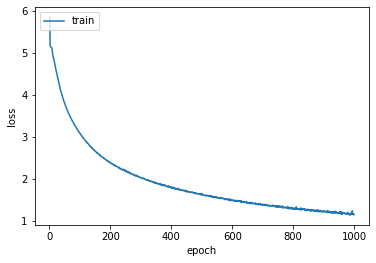

In [88]:

%matplotlib inline
import matplotlib.pyplot as plt

nums = [i for i in range(1,1001)]
# print(nums)
plt.plot(nums,loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

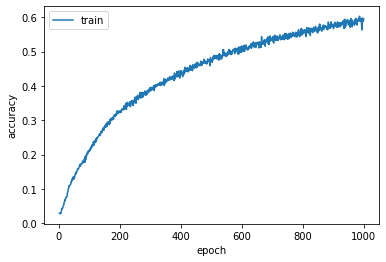

In [89]:

plt.plot(nums,accuracy)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [102]:

#작곡시작
pred_count = 200#생성할 note(또는 rest)의 수
    
seq_in = ['|Note|Dur:4th|Pos:-4', '|Note|Dur:4th|Pos:-2', '|Note|Dur:Half,Dotted|Pos:2']#초기값
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환
for i in range(pred_count):
    sample_in = np.array(seq_in)
    # print("np.array(seq_in) -> sample_in : {}".format(sample_in))
    sample_in = np.reshape(sample_in, (1, 3, 1))
    # print("np.reshape(sample_in,(1,3,1)) -> sample_in : {}".format(sample_in))
    pred_out = model.predict(sample_in)
    # print("model.predict(sample_in) -> pred_out : {}",pred_out) #출력 layer
    idx = np.argmax(pred_out)
    # print("np.argmax(pred_out) -> idx : {}".format(idx)) #활성치가 제일 높은숫자 
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)        #최근값 3개를 유지 이로 인해서 반복되는 구간 발생

print("full song prediction : ", seq_out)

nwc = open('창작곡_실습.txt', 'w')

for item in seq_out:
  nwc.write("%s\n" % item)

nwc.close()


full song prediction :  ['|Note|Dur:4th|Pos:-4', '|Note|Dur:4th|Pos:-2', '|Note|Dur:Half,Dotted|Pos:2', '|Note|Dur:16th|Pos:n-2^|B', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|Note|Dur:8th,Dotted|Pos:#1^', '|N

In [59]:


# NWC format으로 다시 만들기 
import re
fp = codecs.open("창작곡_실습.txt", "r")
lines = fp.readlines()
len_sum = 0 
length = 0 
bar = 0.25 * N   #마디 1개의 길이
update_lines = []
over_length = 0 
cnt = 0 
fp.close()

for note in lines:
    
    cnt += 1
    need_special = False
    resid_special = False
    note = note.replace('\n' , '')
    note_comp = note.split('|')
    
    #길이추출
    matching = [s for s in note_comp if "Dur" in s][0].split(":")[1]
    
    #마디를 씌우기 위한 누적계산
    if matching.find('Half')+1:
        length = 0.5
    elif matching.find('Whole')+1:
        length = 1
    else:        
        length = 1/int(re.findall('\d+', matching)[0])
        
    if matching.find('Dotted')+1:
        length = length + length/2
        
    len_sum += length
    
    #1이하인 경우는 정상이므로 추가한다. 
    if len_sum <= 1:
        update_lines.append(note)
        print(note , length , len_sum)
        
        if len_sum == 1:
            len_sum = 0 
            update_lines.append('|Bar')
            print('|Bar')
        
        #마지막 마디에서 완전하게 음표를 채운다. 
        if len(lines) == cnt:
            print('**********마지막 마디입니다.' , note , len_sum)
            need_len = 1 - len_sum
            
            if need_len > 0:
                
                #마지막 음표를 채운다. 
                if need_len == 0.75:
                    Dur_str = "Half,Dotted"
                elif need_len == 0.5:
                    Dur_str = "Half"
                elif need_len == 0.375:
                    Dur_str = "4th,Dotted"
                elif need_len == 0.25:
                    Dur_str = "4th"
                elif need_len == 0.1875:
                    Dur_str = "8th,Dotted"
                elif need_len == 0.125:
                    Dur_str = "8th"
                elif need_len == 0.09375:
                    Dur_str = "16th,Dotted"
                elif need_len == 0.0625:
                    Dur_str = "16th"
                elif need_len == 0.046875:
                    Dur_str = "32th,Dotted"
                elif need_len == 0.03125:
                    Dur_str = "32th"
                
                note_comp = note.split('|')
                index = [i for i, string in enumerate(note_comp) if "Dur" in string][0]
                Dur_str = "Dur:" + Dur_str
                
                note_comp[index] = Dur_str
                need_str = '|'.join(note_comp)
                
                #마지막 마디의 마지막 음표를 추가한다.(쉼표가 될 수도 있음)
                if Dur_str != "Dur:":
                    update_lines.append(need_str)
                    print("*" , need_str , need_len , 1.0)

            
    else:
        #길이가 over가 된 경우에는 음표를 2개로 쪼개고 가운데에 bar을 찍는다. 
        #Dur이 속한 위치와 길이를 알아낸다.(Dur를 수정해야 하기 때문에)
        note_comp = note.split('|')
        index = [i for i, string in enumerate(note_comp) if "Dur" in string][0]
        matching = [s for s in note_comp if "Dur" in s][0].split(":")[1]
        
        if "Whole" in matching:
            over_length = 1
        elif "Half" in matching:
            over_length = 0.5
        elif "4th" in matching:
            over_length = 1/4
        elif "8th" in matching:
            over_length = 1/8
        elif "16th" in matching:
            over_length = 1/16
        elif "32nd" in matching:
            over_length = 1/32
        else:
            over_length = 0
            
        if "Dotted" in matching:
            over_length = over_length + over_length/2
        
        #마디의 모자란 길이와 남는 길이를 알아내고 bar(마디)를 찍을 준비를 한다. 
        resid_len = len_sum - 1                 #다음 마디로 넘어갈 길이
        need_len = over_length - resid_len      #현재 마디에서 필요한 길이
        
        #마디의 남은 부분 채우기(현재마디의 여분) 
        if need_len == 0.75:
            Dur_str = "Half,Dotted"
        elif need_len == 0.5:
            Dur_str = "Half"
        elif need_len == 0.375:
            Dur_str = "4th,Dotted"
        elif need_len == 0.25:
            Dur_str = "4th"
        elif need_len == 0.1875:
            Dur_str = "8th,Dotted"
        elif need_len == 0.125:
            Dur_str = "8th"
        elif need_len == 0.09375:
            Dur_str = "16th,Dotted"
        elif need_len == 0.0625:
            Dur_str = "16th"
        elif need_len == 0.046875:
            Dur_str = "32th,Dotted"
        elif need_len == 0.03125:
            Dur_str = "32th"
        elif need_len == 0:
            Dur_str = ""
        else:
            #해당사항이 없으면 가장 가까운 음표를 찾아서 넣어준다.(이런 경우는 2개이상의 음표가 필요하다.)
            if need_len == 0.15625 or need_len == 0.625:
                need_special = True

            
        #마디의 over된 부분 채우기(다음 마디로 넘어감)
        if resid_len == 0.75:
            Dur_str2 = "Half,Dotted"
        elif resid_len == 0.5:
            Dur_str2 = "Half"
        elif resid_len == 0.375:
            Dur_str2 = "4th,Dotted"
        elif resid_len == 0.25:
            Dur_str2 = "4th"
        elif resid_len == 0.1875:
            Dur_str2 = "8th,Dotted"
        elif resid_len == 0.125:
            Dur_str2 = "8th"
        elif resid_len == 0.09375:
            Dur_str2 = "16th,Dotted"
        elif resid_len == 0.0625:
            Dur_str2 = "16th"
        elif resid_len == 0.046875:
            Dur_str2 = "32th,Dotted"
        elif resid_len == 0.03125:
            Dur_str2 = "32th"
        elif resid_len == 0:
            Dur_str2 = ""
        else:
            #해당사항이 없으면 가장 가까운 음표를 찾아서 넣어준다.
            resid_special = True
        
        #마디의 여분을 채우는 작업 ########################################1
        len_sum = len_sum - resid_len
        
        Dur_str = "Dur:" + Dur_str
        Dur_str2 = "Dur:" + Dur_str2 
        
        note_comp[index] = Dur_str
        need_str = '|'.join(note_comp)

        note_comp[index] = Dur_str2
        resid_str = '|'.join(note_comp)
        
        if Dur_str != "Dur:":
            update_lines.append(need_str)
            print("*" , need_str , need_len , len_sum)
            
        #마디가 맞지 않는 특별한 상황    
        if need_special == True:
            if need_len == 0.15625:    #8분음표와 32분음표를 추가 
                Dur_str = "Dur:8th"
                note_comp[index] = Dur_str
                need_str = '|'.join(note_comp)
                update_lines.append(need_str)
                print("**" , need_str , 1/8 , len_sum)
                
                Dur_str = "Dur:32nd"
                note_comp[index] = Dur_str
                need_str = '|'.join(note_comp)
                update_lines.append(need_str)
                print("**" , need_str , 1/32 , len_sum)
                
            if need_len == 0.625:      #이분음표와 8분음표를 추가
                Dur_str = "Dur:Half"
                note_comp[index] = Dur_str
                need_str = '|'.join(note_comp)
                update_lines.append(need_str)
                print("**" , need_str , 1/2 , len_sum)
                
                Dur_str = "Dur:8th"
                note_comp[index] = Dur_str
                need_str = '|'.join(note_comp)
                update_lines.append(need_str)
                print("**" , need_str , 1/8 , len_sum)
                
            # ....계속 추가하여 완벽하게 만든다. 

        #마디의 경계를 그려준다.(칸막이) ###############################################2
        update_lines.append('|Bar')
        print('|Bar') 

        #다음 마디로 넘어가는 부분을 그려준다. ##########################################3 
        len_sum = resid_len
        
        if Dur_str2 != "Dur:":
            update_lines.append(resid_str)
            print("*" , resid_str , resid_len , len_sum)

        #음표길이 문자열을 초기화한다. ####################################
        Dur_str = ""
        Dur_str2 = ""        



|Note|Dur:4th|Pos:-4 0.25 0.25
|Note|Dur:4th|Pos:-2 0.25 0.5
* |Note|Dur:Half|Pos:-3 0.5 1.0
|Bar
* |Note|Dur:4th|Pos:-3 0.25 0.25
|Note|Dur:Half|Pos:#-1 0.5 0.75
|Note|Dur:4th|Pos:#-1 0.25 1.0
|Bar
|Note|Dur:4th|Pos:-4 0.25 0.25
|Note|Dur:Half,Dotted|Pos:2 0.75 1.0
|Bar
|Note|Dur:4th|Pos:-1 0.25 0.25
* |Note|Dur:Half,Dotted|Pos:-5 0.75 1.0
|Bar
* |Note|Dur:4th|Pos:-5 0.25 0.25
|Note|Dur:Half|Pos:0 0.5 0.75
|Note|Dur:4th|Pos:-2 0.25 1.0
|Bar
|Note|Dur:4th|Pos:-8 0.25 0.25
|Note|Dur:4th|Pos:-3 0.25 0.5
|Rest|Dur:8th 0.125 0.625
|Note|Dur:16th,Dotted|Pos:2^ 0.09375 0.71875
|Rest|Dur:16th,Dotted 0.09375 0.8125
|Note|Dur:16th|Pos:-2|B 0.0625 0.875
|Note|Dur:8th|Pos:1^|B 0.125 1.0
|Bar
|Note|Dur:32nd|Pos:-2^ 0.03125 0.03125
|Note|Dur:8th,Dotted|Pos:1|B 0.1875 0.21875
|Note|Dur:8th|Pos:1^ 0.125 0.34375
|Bar
* |Note|Dur:16th,Dotted|Pos:-3 0.09375 0.09375
|Note|Dur:4th|Pos:-4 0.25 0.34375
|Note|Dur:8th|Pos:-2|B 0.125 0.46875
|Note|Dur:8th|Pos:-2^ 0.125 0.59375
|Bar
* |Note|Dur:16th,Dotted|Pos:

In [0]:

#Beam(잇단음표)에 해당하는 문자열을 넣어준다. #########################################
start = False
end = False
cnt = 0 

for uline in update_lines:
    cnt += 1
    
    if 'Bar' in uline:
        start = False
        before_line = update_lines[cnt-2]
        
        if 'BF' in before_line:
            before_line = before_line.replace('|BF' , '')
            update_lines[cnt-2] = before_line
        elif 'BM' in before_line:
            before_line = before_line.replace('BM' , 'BE')
            update_lines[cnt-2] = before_line
    
    if uline[-1] == "B" and start == False:
        start = True
        uline = uline.replace('B' , 'BF')
        update_lines[cnt-1] = uline
    elif start == True and uline[-1] == "B":
        uline = uline.replace('B' , 'BM')
        update_lines[cnt-1] = uline
    elif start == True and uline[-1] != "B":
        uline = uline + '|BE'
        end = True
        start = False
        update_lines[cnt-1] = uline

#마지막 라인도 같은 방법으로 수정함.
last_line = update_lines[len(update_lines)-1]
last_line

if 'BF' in last_line:
    last_line = last_line.replace('|BF' , '')
    update_lines[len(update_lines)-1] = last_line
elif 'BM' in last_line:
    last_line = last_line.replace('BM' , 'BE')
    update_lines[len(update_lines)-1] = last_line
    


In [61]:

#print(update_lines)
cnt = 0 
#특정 작곡프로그램의 format에 맞게 수정함. 
for uline in update_lines:
    cnt += 1
    
    if 'Pos' in uline:
        #음의 높이를 구하기(음의 높이에 따라 stem의 방향이 바뀐다.)
        uline_comp = uline.split('|')
        index = [i for i, string in enumerate(uline_comp) if "Pos" in string][0]
        matching = [s for s in uline_comp if "Pos" in s][0].split(":")[1]
        pos = int(re.findall('[+-]*\d+', matching)[0])
        
        if pos < 0:
            direct = "Opts:Stem=Up,"
        else:
            direct = "Opts:Stem=Down,"
            
    else:
        direct = ""

    uline = uline.replace('BE',direct + 'Beam=End')
    uline = uline.replace('BF',direct + 'Beam=First')
    uline = uline.replace('BM','Beam')

    update_lines[cnt-1] = uline 
    
    print(uline , pos) 

|Note|Dur:4th|Pos:-4 -4
|Note|Dur:4th|Pos:-2 -2
|Note|Dur:Half|Pos:-3 -3
|Bar -3
|Note|Dur:4th|Pos:-3 -3
|Note|Dur:Half|Pos:#-1 -1
|Note|Dur:4th|Pos:#-1 -1
|Bar -1
|Note|Dur:4th|Pos:-4 -4
|Note|Dur:Half,Dotted|Pos:2 2
|Bar 2
|Note|Dur:4th|Pos:-1 -1
|Note|Dur:Half,Dotted|Pos:-5 -5
|Bar -5
|Note|Dur:4th|Pos:-5 -5
|Note|Dur:Half|Pos:0 0
|Note|Dur:4th|Pos:-2 -2
|Bar -2
|Note|Dur:4th|Pos:-8 -8
|Note|Dur:4th|Pos:-3 -3
|Rest|Dur:8th -3
|Note|Dur:16th,Dotted|Pos:2^ 2
|Rest|Dur:16th,Dotted 2
|Note|Dur:16th|Pos:-2|Opts:Stem=Up,Beam=First -2
|Note|Dur:8th|Pos:1^|Opts:Stem=Down,Beam=End 1
|Bar 1
|Note|Dur:32nd|Pos:-2^ -2
|Note|Dur:8th,Dotted|Pos:1|Opts:Stem=Down,Beam=First 1
|Note|Dur:8th|Pos:1^|Opts:Stem=Down,Beam=End 1
|Bar 1
|Note|Dur:16th,Dotted|Pos:-3 -3
|Note|Dur:4th|Pos:-4 -4
|Note|Dur:8th|Pos:-2|Opts:Stem=Up,Beam=First -2
|Note|Dur:8th|Pos:-2^|Opts:Stem=Up,Beam=End -2
|Bar -2
|Note|Dur:16th,Dotted|Pos:-2^ -2
|Rest|Dur:8th -2
|Note|Dur:8th|Pos:4|Opts:Stem=Down,Beam=First 4
|Note|Dur:8th|Pos

In [62]:

#최종 악보만들기 

preface = ['!NoteWorthyComposer(2.75)' , '|Clef|Type:Treble' , '|TimeSig|Signature:4/4' , '|Tempo|Tempo:128|Pos:6','|Bar']
postface = ['!NoteWorthyComposer-End']        
update_lines = preface + update_lines + postface

nwc = open('창작곡.nwctxt', 'w')

for uline in update_lines:
  nwc.write("%s\n" % uline)

nwc.close()
print(update_lines)


['!NoteWorthyComposer(2.75)', '|Clef|Type:Treble', '|TimeSig|Signature:4/4', '|Tempo|Tempo:128|Pos:6', '|Bar', '|Note|Dur:4th|Pos:-4', '|Note|Dur:4th|Pos:-2', '|Note|Dur:Half|Pos:-3', '|Bar', '|Note|Dur:4th|Pos:-3', '|Note|Dur:Half|Pos:#-1', '|Note|Dur:4th|Pos:#-1', '|Bar', '|Note|Dur:4th|Pos:-4', '|Note|Dur:Half,Dotted|Pos:2', '|Bar', '|Note|Dur:4th|Pos:-1', '|Note|Dur:Half,Dotted|Pos:-5', '|Bar', '|Note|Dur:4th|Pos:-5', '|Note|Dur:Half|Pos:0', '|Note|Dur:4th|Pos:-2', '|Bar', '|Note|Dur:4th|Pos:-8', '|Note|Dur:4th|Pos:-3', '|Rest|Dur:8th', '|Note|Dur:16th,Dotted|Pos:2^', '|Rest|Dur:16th,Dotted', '|Note|Dur:16th|Pos:-2|Opts:Stem=Up,Beam=First', '|Note|Dur:8th|Pos:1^|Opts:Stem=Down,Beam=End', '|Bar', '|Note|Dur:32nd|Pos:-2^', '|Note|Dur:8th,Dotted|Pos:1|Opts:Stem=Down,Beam=First', '|Note|Dur:8th|Pos:1^|Opts:Stem=Down,Beam=End', '|Bar', '|Note|Dur:16th,Dotted|Pos:-3', '|Note|Dur:4th|Pos:-4', '|Note|Dur:8th|Pos:-2|Opts:Stem=Up,Beam=First', '|Note|Dur:8th|Pos:-2^|Opts:Stem=Up,Beam=End', '|

In [99]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

TypeError: ignored